# <font color='purple'>Online News Popularity Case study</font>

### <font color = 'brown' size = 4 >Problem Statment</font>

- There are multiple areas of applications for online news popularity prediction. One of these includes gaining better insights into the audience consuming online news content. Consequently, it increases the ability of news organizations to deliver more relevant and appealing content in a proactive manner. Also, the company can allocate resources more wisely to prepare stories over its life cycle. Moreover, prediction of news content is also beneﬁcial for trend forecasting, understanding the collective human behavior, advertisers to propose more proﬁtable monetization techniques, and readers to ﬁlter huge amounts of information quickly and efﬁciently.
- Our primary objective is to build an efficient ML model which could predict the number of shares of a specific news article before its publishing and make business recommendations to companies for maximizing their profit.

In [1]:
#Data Structures
import pandas as pd
import numpy as np
import re
import sklearn,math

#Preprocessing
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# Cross validation
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Models
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge

# Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Modifying settings to ensure that all the required rows and columns are displayed
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
# Displaying the values in float format
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Step 1: Reading and Understanding the Data

In [4]:
# Reading the dataframe
data_df = pd.read_csv("train.csv")
unseen_df = pd.read_csv("test.csv")

In [5]:
data_df.head()

,id,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0,http://mashable.com/2013/03/15/build-arduino-p...,8.00000,211.00000,0.62981,1.00000,0.80000,6.00000,3.00000,0.00000,0.00000,4.60664,8.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,217.00000,2300.00000,797.71429,0.00000,617900.00000,115912.50000,0.00000,5103.04255,2568.64871,2000.00000,2000.00000,2000.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.02502,0.02505,0.02501,0.02538,0.89954,0.64742,0.18284,0.03318,0.00474,0.87500,0.12500,0.41344,0.10000,0.60000,-0.10000,nan,-0.10000,1.00000,0.60000,0.50000,0.60000,36700
1,1,http://mashable.com/2013/09/04/edible-bar-codes/,12.00000,416.00000,0.60354,1.00000,0.66358,22.00000,7.00000,1.00000,16.00000,5.00481,7.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,4.00000,768.00000,259.40000,0.00000,nan,169071.42857,0.00000,3339.79020,2112.66584,658.00000,13700.00000,4477.25000,0.00000,0.00000,1.00000,0.00000,nan,0.00000,0.00000,0.00000,0.17098,0.02908,0.02857,0.74279,0.02857,0.44925,0.14891,0.03846,nan,0.80000,0.20000,0.32472,0.03333,1.00000,-0.22862,-0.50000,-0.07143,0.00000,0.00000,0.50000,0.00000,24200
2,2,http://mashable.com/2014/06/20/non-player-char...,7.00000,229.00000,0.63839,1.00000,0.74648,9.00000,4.00000,1.00000,1.00000,4.82969,8.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,-1.00000,1100.00000,472.62500,4800.00000,843300.00000,204837.50000,1575.40000,3562.10163,2589.12548,4800.00000,nan,4800.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.02505,0.02504,0.02500,0.02500,0.89991,0.35321,0.11660,0.03493,0.02183,nan,0.38462,0.35455,0.05000,1.00000,-0.26083,-0.50000,-0.16667,0.00000,0.00000,0.50000,0.00000,945
3,3,http://mashable.com/2014/08/06/food-art-vine-c...,9.00000,473.00000,0.54237,1.00000,0.75281,7.00000,0.00000,1.00000,1.00000,4.63425,7.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,-1.00000,447.00000,150.40000,0.00000,843300.00000,229728.57143,0.00000,3504.93380,nan,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,nan,0.00000,0.00000,0.00000,0.02858,0.02858,0.02858,0.16685,0.74741,0.54896,0.25437,0.06554,0.01057,0.86111,0.13889,0.35625,0.13636,0.70000,-0.16750,-0.25000,-0.10000,0.00000,0.00000,0.50000,0.00000,844
4,4,http://mashable.com/2014/12/17/blackberry-clas...,13.00000,1097.00000,0.50521,1.00000,0.67634,10.00000,4.00000,14.00000,0.00000,4.67821,4.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,1200.00000,299.25000,33100.00000,843300.00000,381925.00000,2822.63518,5418.75000,3668.28564,1400.00000,2300.00000,2000.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.05000,0.05228,0.05015,0.79754,0.05004,0.43652,0.15679,0.04102,0.01003,0.80357,0.19643,0.36625,0.03333,1.00000,-0.19318,-0.31250,-0.10000,0.38333,0.16667,0.11667,0.16667,551


In [6]:
# Creating a dataframe without id column
data=data_df.drop(['id','url'],axis=1)
unseen=unseen_df.drop(['id','url'],axis=1)

# Printing the shape of dataframe
print("Shape of Train dataset",data.shape)
print("Shape of Unseen dataset",unseen.shape)

Shape of Train dataset (29733, 59)
Shape of Unseen dataset (9911, 58)


In [7]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29733 entries, 0 to 29732
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   n_tokens_title                 29733 non-null  float64
 1   n_tokens_content               29733 non-null  float64
 2   n_unique_tokens                29733 non-null  float64
 3   n_non_stop_words               29733 non-null  float64
 4   n_non_stop_unique_tokens       29733 non-null  float64
 5   num_hrefs                      28921 non-null  float64
 6   num_self_hrefs                 25200 non-null  float64
 7   num_imgs                       24326 non-null  float64
 8   num_videos                     29146 non-null  float64
 9   average_token_length           29733 non-null  float64
 10  num_keywords                   29269 non-null  float64
 11  data_channel_is_lifestyle      29733 non-null  float64
 12  data_channel_is_entertainment  29733 non-null 

In [8]:
data.describe(include="all")

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,29733.00000,29733.00000,29733.00000,29733.00000,29733.00000,28921.00000,25200.00000,24326.00000,29146.00000,29733.00000,29269.00000,29733.00000,29733.00000,29733.00000,29733.00000,29733.00000,29733.00000,28649.00000,29277.00000,29649.00000,29596.00000,28218.00000,29616.00000,29428.00000,29052.00000,28760.00000,29449.00000,27971.00000,29409.00000,28752.00000,28980.00000,28179.00000,29434.00000,28867.00000,29642.00000,28237.00000,27565.00000,29733.00000,29733.00000,29733.00000,29733.00000,29733.00000,27487.00000,29382.00000,28898.00000,28845.00000,29146.00000,29140.00000,28495.00000,29288.00000,29584.00000,29546.00000,28951.00000,29021.00000,29605.00000,29466.00000,28934.00000,28276.00000,29733.00000
mean,10.40386,545.37665,0.55407,1.00424,0.69459,10.86671,3.28540,4.51278,1.26336,4.54296,7.21798,0.05267,0.17533,0.15828,0.05839,0.18505,0.21387,25.83595,1154.76924,311.12847,13653.67857,753460.48621,259904.90338,1121.52535,5658.80107,3141.08965,3949.20220,10461.34024,6426.07928,0.16788,0.18678,0.18752,0.18407,0.14297,0.06191,0.06810,0.12977,0.18539,0.14041,0.21721,0.22369,0.23327,0.44313,0.11895,0.03955,0.01659,0.68138,0.28793,0.35317,0.09564,0.75511,-0.25906,-0.52121,-0.10700,0.28207,0.07114,0.34242,0.15563,3439.84058
std,2.12210,471.47614,4.06462,6.03979,3.76888,11.38488,3.85162,8.33552,4.15847,0.85594,1.91226,0.22338,0.38025,0.36501,0.23448,0.38834,0.41004,69.31670,4008.59597,623.94356,57864.53207,213165.45029,135215.39934,1136.66180,6094.27727,1323.73401,18771.37952,41548.11605,23705.05471,0.37377,0.38974,0.39033,0.38755,0.35004,0.24099,0.25193,0.33605,0.26411,0.21850,0.28324,0.29524,0.28896,0.11742,0.09696,0.01745,0.01078,0.19125,0.15616,0.10522,0.07170,0.24849,0.12808,0.29119,0.09524,0.32426,0.26505,0.18855,0.22609,12212.12334
min,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.00000,-1.00000,0.00000,0.00000,0.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.39375,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,-1.00000,-1.00000,0.00000,-1.00000,0.00000,0.00000,1.00000
25%,9.00000,245.00000,0.47138,1.00000,0.62660,4.00000,1.00000,1.00000,0.00000,4.47712,6.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,444.00000,141.00000,0.00000,843300.00000,173296.42857,0.00000,3562.10163,2386.45674,636.00000,1100.00000,980.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.02506,0.02501,0.02857,0.02857,0.02857,0.39607,0.05755,0.02827,0.00960,0.60000,0.18571,0.30503,0.05000,0.60000,-0.32797,-0.70000,-0.12500,0.00000,0.00000,0.16667,0.00000,947.00000
50%,10.00000,407.00000,0.54000,1.00000,0.69128,7.00000,3.00000,1.00000,0.00000,4.66372,7.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,659.00000,234.00000,1400.00000,843300.00000,

**Observations:**
- We can Observe null values in the dataset and few columns have only one value. As this might build an unstable model, we will be handling those null values by imputing or dropping them.
- We will also check for columns with no variance as it wont be helpful in building a model.

## Step 2: Cleaning Data

### 2.1: Handling null values in 'data'  and 'unseen' dataframes

In [9]:
# Calculating percentage nulls in data and unseen dataframe
null_data_perc=pd.Series(round(100*(data.isnull().sum()/data.shape[0]),2))
null_unseen_perc=pd.Series(round(100*(unseen.isnull().sum()/unseen.shape[0]),2))

# Calculating null count in data and unseen dataframe
null_data_count=pd.Series(data.isnull().sum())
null_unseen_count=pd.Series(unseen.isnull().sum())

# Create dataframe with null counts and percentages
null_data_df=pd.DataFrame(pd.concat([null_data_count,null_data_perc],axis=1))
null_unseen_df=pd.DataFrame(pd.concat([null_unseen_count,null_unseen_perc],axis=1))

# Rest index of dataframe
null_data_df=null_data_df.reset_index()
null_unseen_df=null_unseen_df.reset_index()

# Assign the column names to the dataframe
null_data_df.columns=['Column Name','Null Counts', 'Null Percentages']
null_unseen_df.columns=['Column Name','Null Counts', 'Null Percentages']

# Sorting the data by percentage nulls
null_data_df.sort_values(by='Null Percentages',ascending=False,inplace=True)
null_unseen_df.sort_values(by='Null Percentages',ascending=False,inplace=True)

# Retaining only those features with percentage greater than 0
null_data_df=null_data_df[null_data_df['Null Counts']>0]
null_unseen_df=null_data_df[null_unseen_df['Null Counts']>0]

In [10]:
# Printing the null percentages dataframe 
null_data_df

,Column Name,Null Counts,Null Percentages
7,num_imgs,5407,18.19000
6,num_self_hrefs,4533,15.25000
42,global_subjectivity,2246,7.55000
36,is_weekend,2168,7.29000
27,self_reference_max_shares,1762,5.93000
31,weekday_is_wednesday,1554,5.23000
21,kw_max_max,1515,5.10000
35,weekday_is_sunday,1496,5.03000
57,abs_title_sentiment_polarity,1457,4.90000
48,avg_positive_polarity,1238,4.16000


In [11]:
# Printing the null percentages dataframe 
null_unseen_df

,Column Name,Null Counts,Null Percentages
7,num_imgs,5407,18.19000
6,num_self_hrefs,4533,15.25000
42,global_subjectivity,2246,7.55000
36,is_weekend,2168,7.29000
27,self_reference_max_shares,1762,5.93000
31,weekday_is_wednesday,1554,5.23000
21,kw_max_max,1515,5.10000
35,weekday_is_sunday,1496,5.03000
57,abs_title_sentiment_polarity,1457,4.90000
48,avg_positive_polarity,1238,4.16000


<AxesSubplot:>

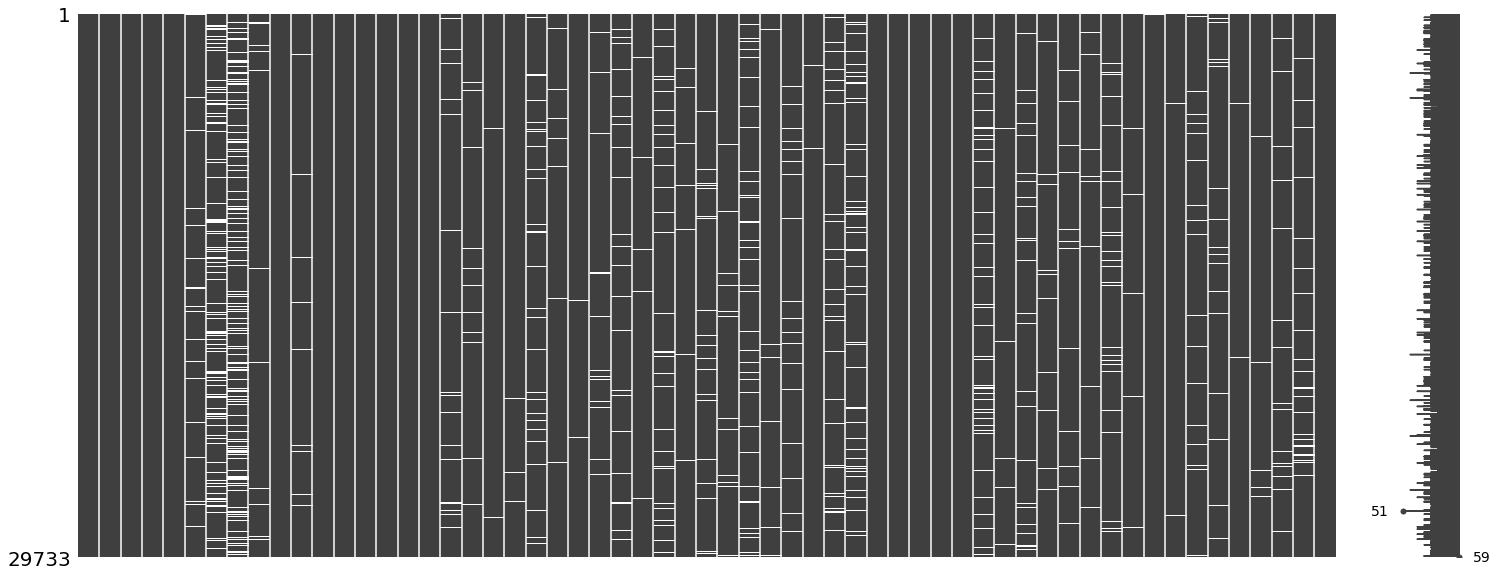

In [12]:
# plotting matrix graph for missing values
msno.matrix(data)

<AxesSubplot:>

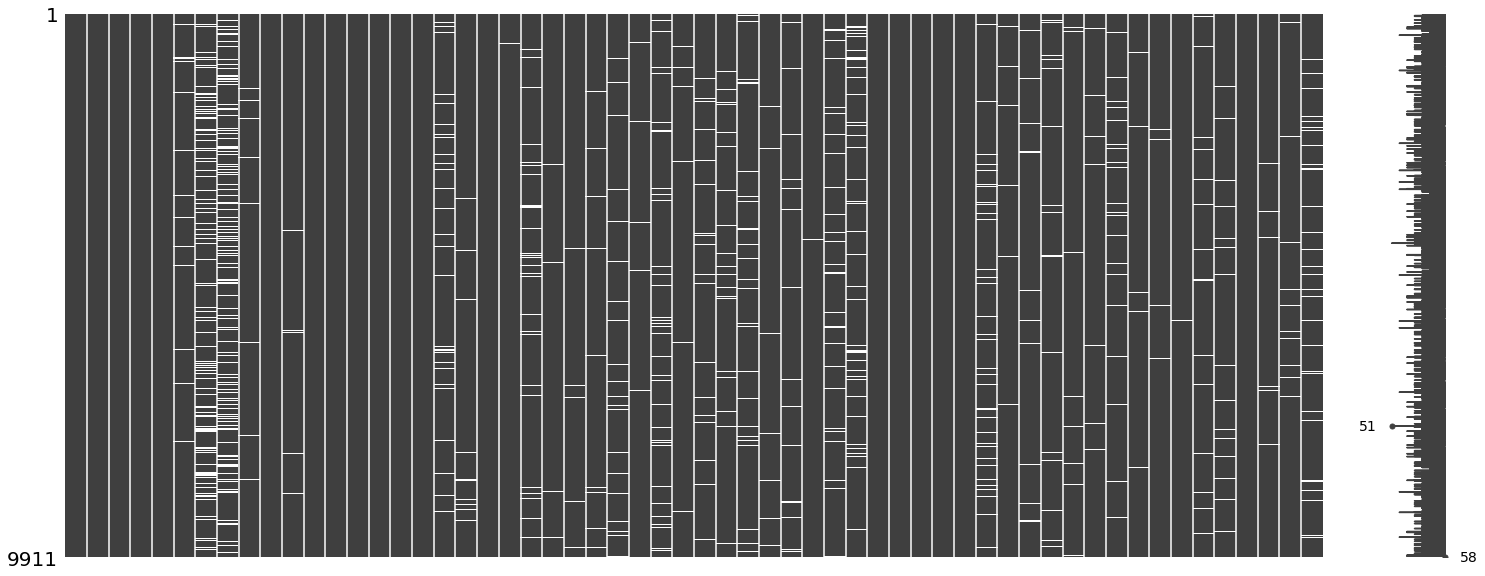

In [13]:
# Plotting bar graph for missing values for unseen dataframe
msno.matrix(unseen)

**Observations:**
- We can observe that both 'data' and 'unseen' datasets do not have null values greater than 40%.
- From the matrix we can observe that the data is missing completely at random.
- We will be imputing these values using mean/median/mode.

#### 2.1.1: Imputing categorical Columns

As the below columns are categorical columns and have null values we will be imputing these columns with mode.
- is_weekend
- weekday_is_wednesday
- weekday_is_sunday
- weekday_is_monday
- weekday_is_friday
- weekday_is_tuesday
- weekday_is_thursday
- weekday_is_saturday

In [14]:
# Creating a list of categorical columns to be imputed
cat_cols=['is_weekend','weekday_is_wednesday','weekday_is_sunday','weekday_is_monday','weekday_is_friday','weekday_is_tuesday','weekday_is_thursday','weekday_is_saturday']

In [15]:
# Imputing the categorical columns with mode
for i in cat_cols:
    data[i]=data[i].fillna(data[i].mode()[0])
    unseen[i]=unseen[i].fillna(unseen[i].mode()[0])

#### 2.1.2: Imputing Numerical Columns

Below columns are numerical columns and there might be an underlying reason for these columns to be null. Hence, we will be imputing these columns with an arbitrary value of 0.
- num_imgs
- num_self_hrefs
- num_hrefs
- num_videos
- self_reference_max_shares
- self_reference_avg_sharess
- self_reference_min_shares

In [16]:
# Creating a list of numerical columns to be imputed
num_cols1=['num_imgs','num_self_hrefs','num_hrefs','num_videos','self_reference_max_shares','self_reference_avg_sharess','self_reference_min_shares']

In [17]:
# Imputing the few numerical columns with 0
for i in num_cols1:
    data[i]=data[i].fillna(0)
    unseen[i]=unseen[i].fillna(0)

Below columns are numerical columns and are missing completely at random and cannot be predicted. Hence we will be imputing these values with median as we there might be outliers in data and mean can be misleading the model.
- kw_max_max
- abs_title_sentiment_polarity
- avg_positive_polarity
- kw_min_min
- kw_avg_avg
- global_rate_negative_words
- global_rate_positive_words
- abs_title_subjectivity
- min_negative_polarity
- kw_max_avg
- rate_negative_words
- rate_positive_words
- num_keywords
- kw_max_min
- min_positive_polarity
- global_sentiment_polarity
- kw_min_avg
- title_sentiment_polarity
- avg_negative_polarity
- max_positive_polarity
- kw_min_max
- title_subjectivity
- kw_avg_max
- kw_avg_min
- max_negative_polarity
- global_subjectivity

In [18]:
# Creating a list of numerical columns to be imputed by median
num_cols2=['kw_max_max','abs_title_sentiment_polarity','avg_positive_polarity','kw_min_min','kw_avg_avg','global_rate_negative_words','global_rate_positive_words','abs_title_subjectivity','min_negative_polarity','kw_max_avg','rate_negative_words','rate_positive_words','num_keywords','kw_max_min','min_positive_polarity','global_sentiment_polarity','kw_min_avg','title_sentiment_polarity','avg_negative_polarity','max_positive_polarity','kw_min_max','title_subjectivity','kw_avg_max','kw_avg_min','max_negative_polarity','global_subjectivity']

In [19]:
# Imputing the few numerical columns with median
for i in num_cols2:
    data[i]=data[i].fillna(data[i].median())
    unseen[i]=unseen[i].fillna(unseen[i].median())

### Step 2.2: Checking for columns having only one value.

   - If a column has the same value for every row in the dataset, there would be no variance and such columns would not be useful for model building. Therefore we will identify such columns and remove them.

In [20]:
# Creating a list of columns with only one value for 'data' dataframe
unique_vals_data=data.nunique().reset_index()
unique_vals_data.columns=['column','unique counts']
unique_vals_data=list(unique_vals_data[unique_vals_data['unique counts']==1].column)

# Creating a list of columns with only one value for 'unseen' dataframe
unique_vals_unseen=unseen.nunique().reset_index()
unique_vals_unseen.columns=['column','unique counts']
unique_vals_unseen=list(unique_vals_unseen[unique_vals_unseen['unique counts']==1].column)

In [21]:
# Checking the columns with only one value in 'data' dataframe
unique_vals_data

[]

In [22]:
# Checking the columns with only one value in 'unseen' dataframe
unique_vals_unseen

[]

**Observations:**
- We donot have any columns with only one value. Hence, we will not be dropping any columns.

In [23]:
# Printing the shape of datasets after Cleaning
print("Shape of data dataset",data.shape)
print("Shape of unseen dataset",unseen.shape)

Shape of data dataset (29733, 59)
Shape of unseen dataset (9911, 58)


<AxesSubplot:>

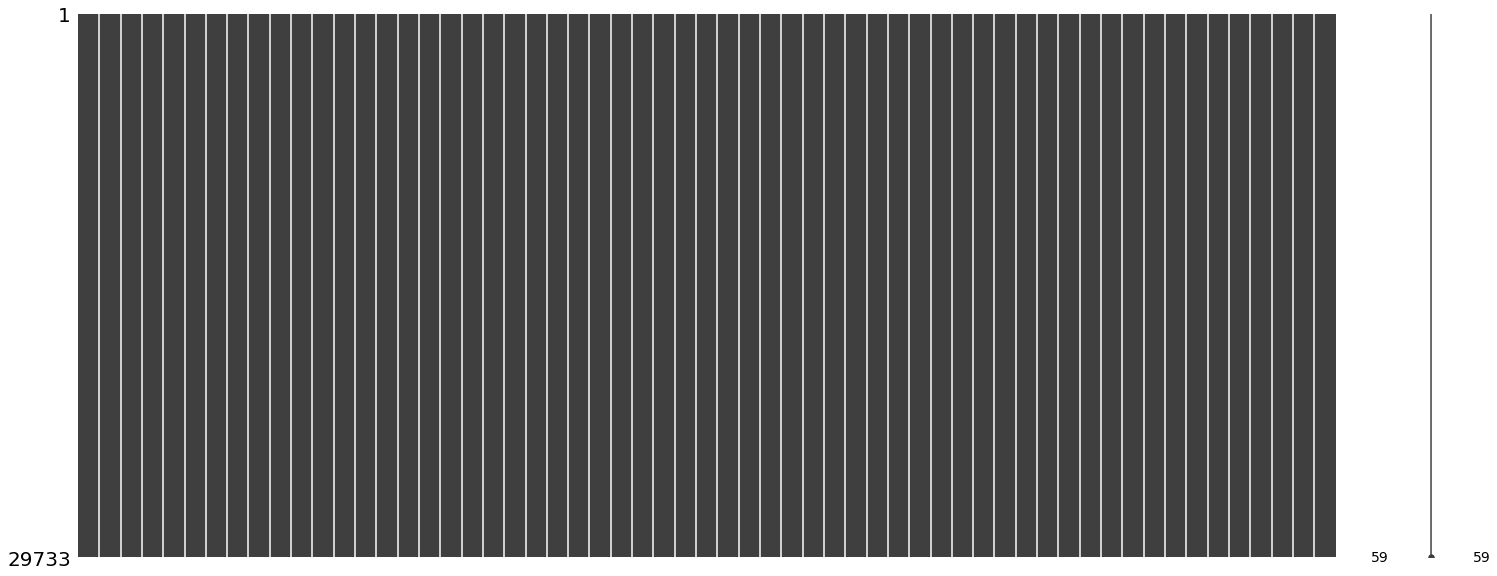

In [24]:
msno.matrix(data)

**Observations:**
- All the null values in the dataset have been removed and there are no columns with zero variance. We can go ahead with EDA for the dataset

## Step 3: Exploratory Data Analysis

### 3.1: Univariate Analysis

#### 3.1.1: Univariate analysis for Numerical Columns

<AxesSubplot:>

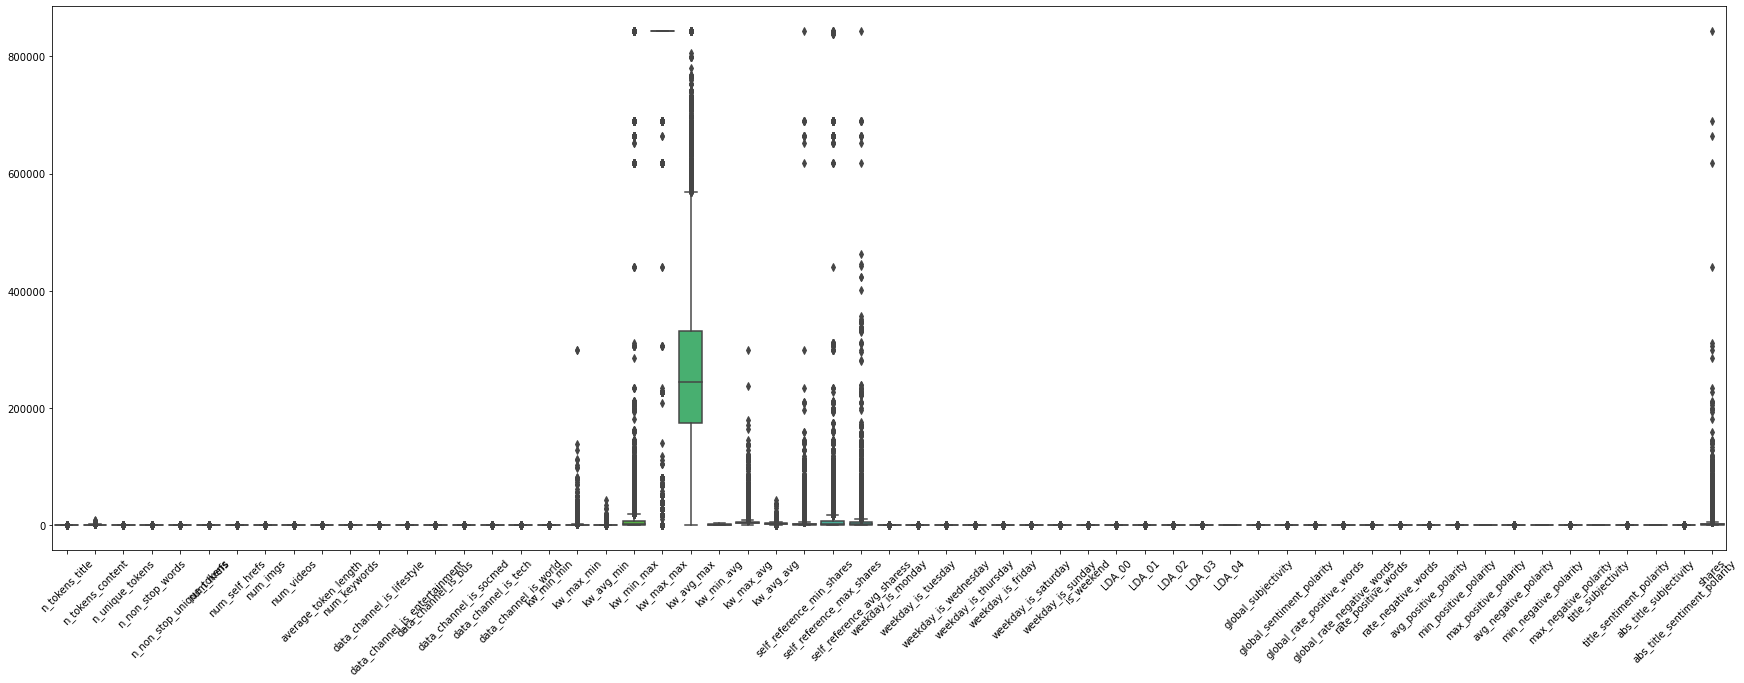

In [25]:
# Plotting a boxplot for 'data' as all features are numerical
plt.figure(figsize=(30,10))
plt.xticks(rotation=45)
plt.ticklabel_format(useOffset=False,style='plain')
sns.boxplot(data = data)

**Observations:**
- We can observe outliers for few columns. As the range of the dataset is huge we are not able to see any outilers for a good amount of columns. We will be capping these outliers and perform Univariate and Bivariate Analysis.

### Capping the outliers

In [26]:
# Creating a function for capping the outliers
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [27]:
# Capping outliers for 'data' and 'unseen' dataframes
data = data.apply(cap_outliers)
unseen = unseen.apply(cap_outliers)

<AxesSubplot:>

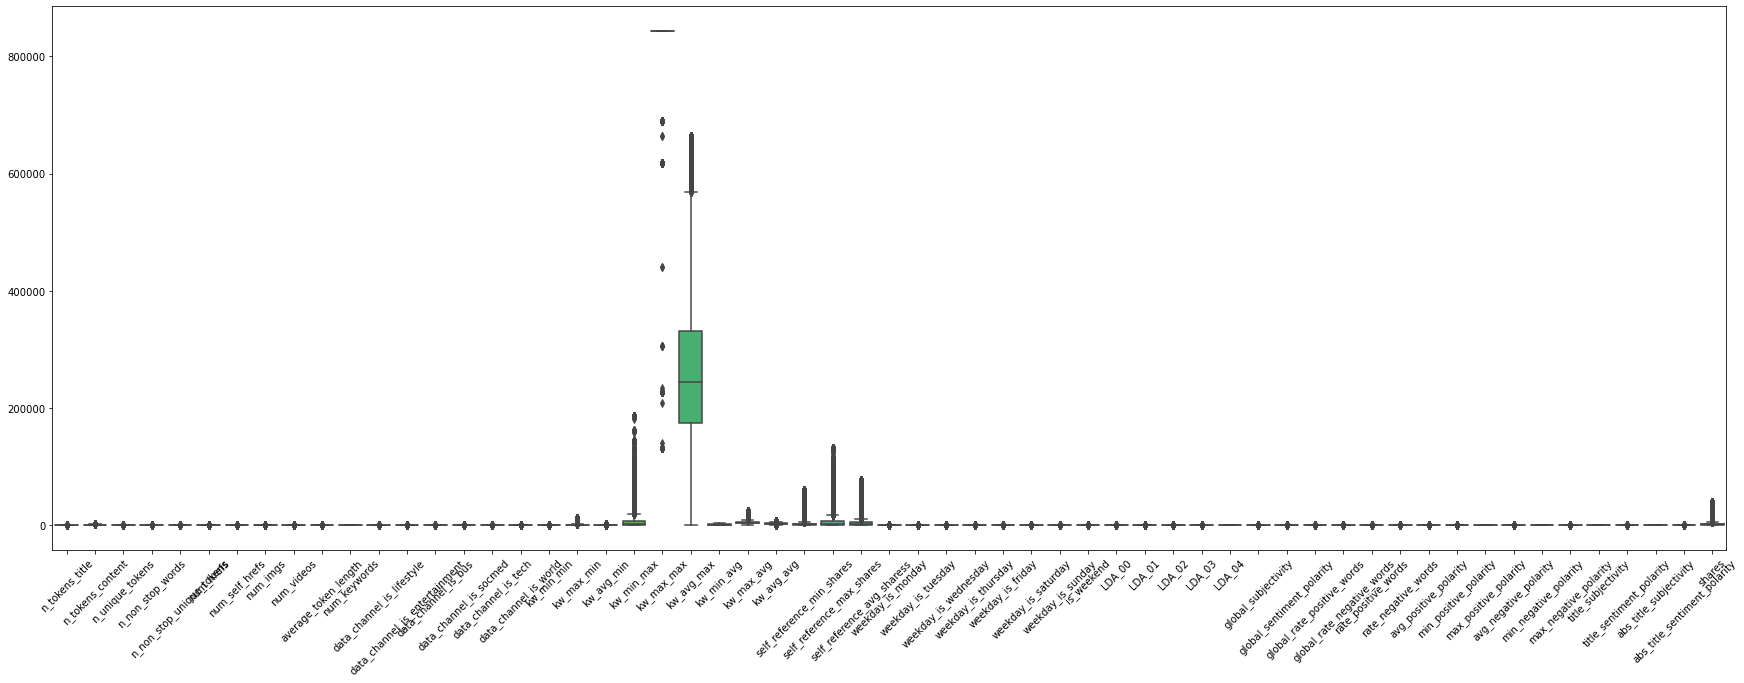

In [28]:
# Plotting a boxplot for 'data' 
plt.figure(figsize=(30,10))
plt.xticks(rotation=45)
plt.ticklabel_format(useOffset=False,style='plain')
sns.boxplot(data = data)

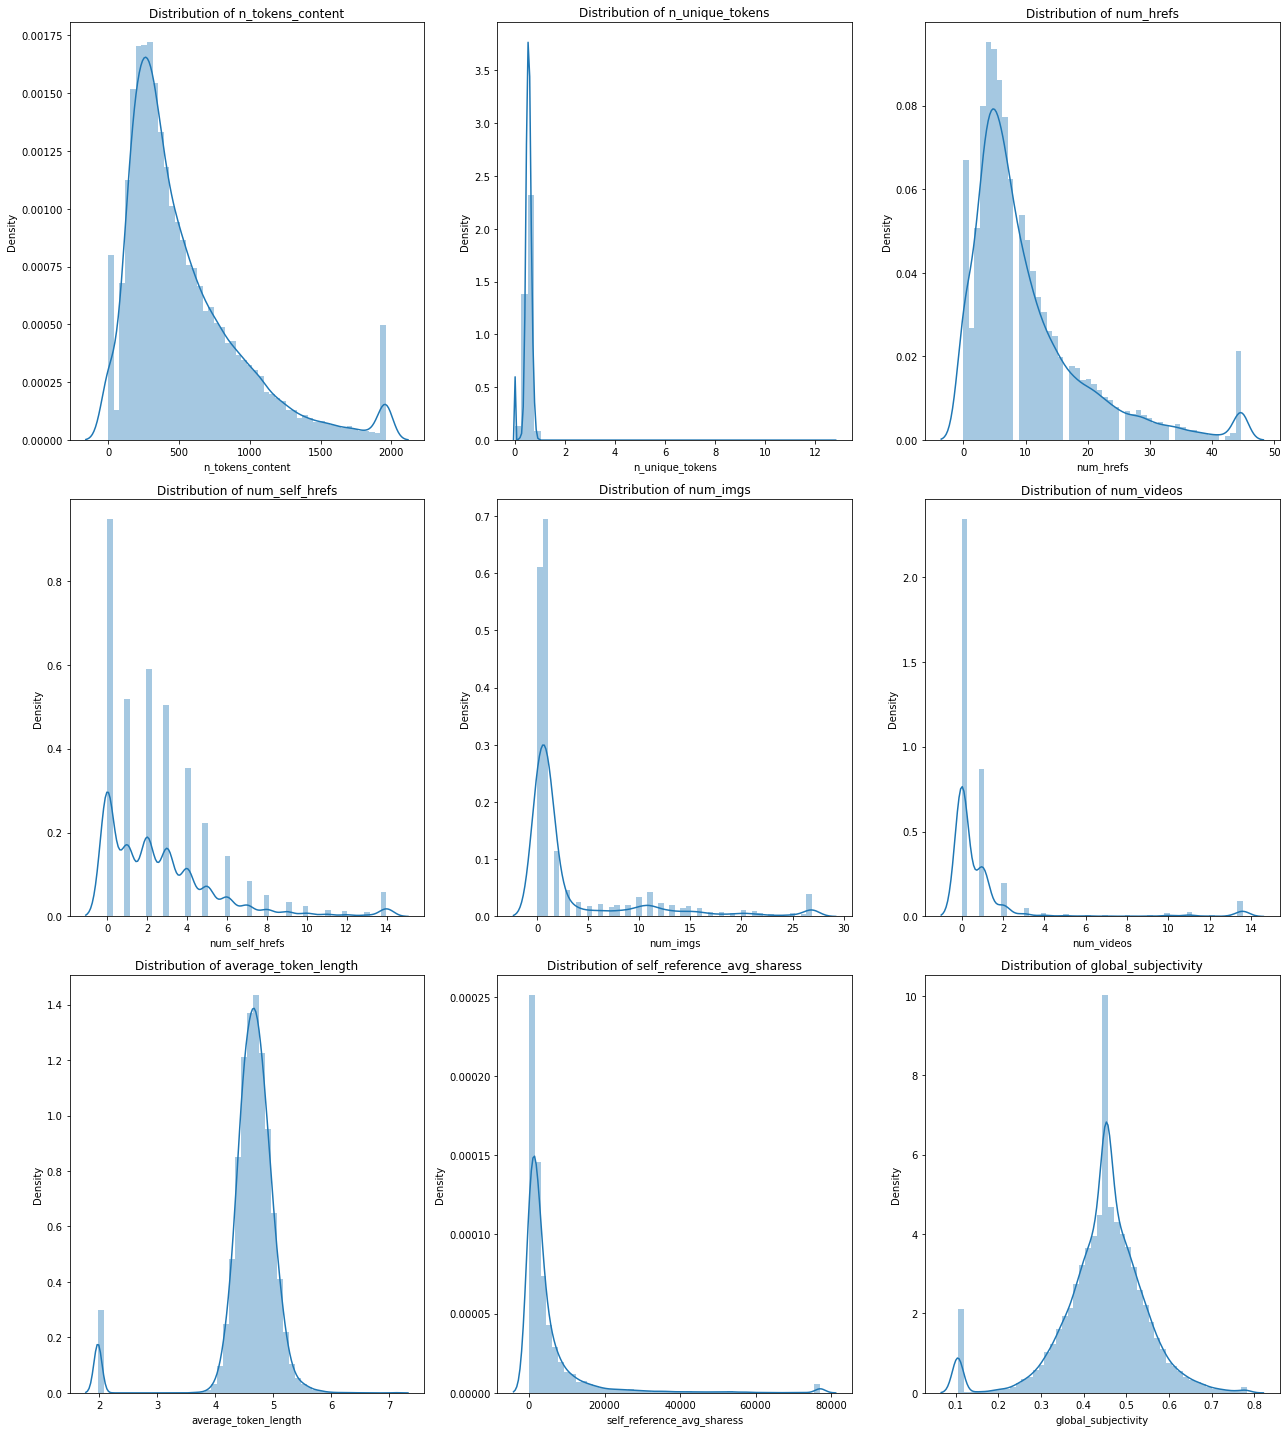

In [29]:
# Plotting histograms for numerical columns
numerical_cols=['n_tokens_content','n_unique_tokens','num_hrefs','num_self_hrefs','num_imgs','num_videos','average_token_length','self_reference_avg_sharess','global_subjectivity']
# Setting the figure size
plt.figure(figsize=(18,20))

for i in range(0,len(numerical_cols)):
    # There are three numerical columns, which will be plotted in a 1x3 grid
    plt.subplot(3,3,i+1)
    plt.title('Distribution of '+numerical_cols[i])
    sns.distplot(data[numerical_cols[i]])
plt.tight_layout()
plt.show()

**Observations:**
- For n_tokens_content, We can observe the distribution is skewed, where the peak is at around 300 which means the maximum number of words in an article is close to 300 or less.
- For num_hrefs, the data ranges between 1-40, and we can also see a peak at at around 5 which means most of the news articles have close to 4-6 links. Whereas, num_self_hrefs, has a peak at 0 meaning most of the articles produced by mashable has 0 video links for articles produced by mashable.
- Average_token_length has range between 4-6, which means the words have 4-6 letters and are easy to read for all kinds of readers.

#### Step 3.1.2: Univariate analysis for categorical Columns

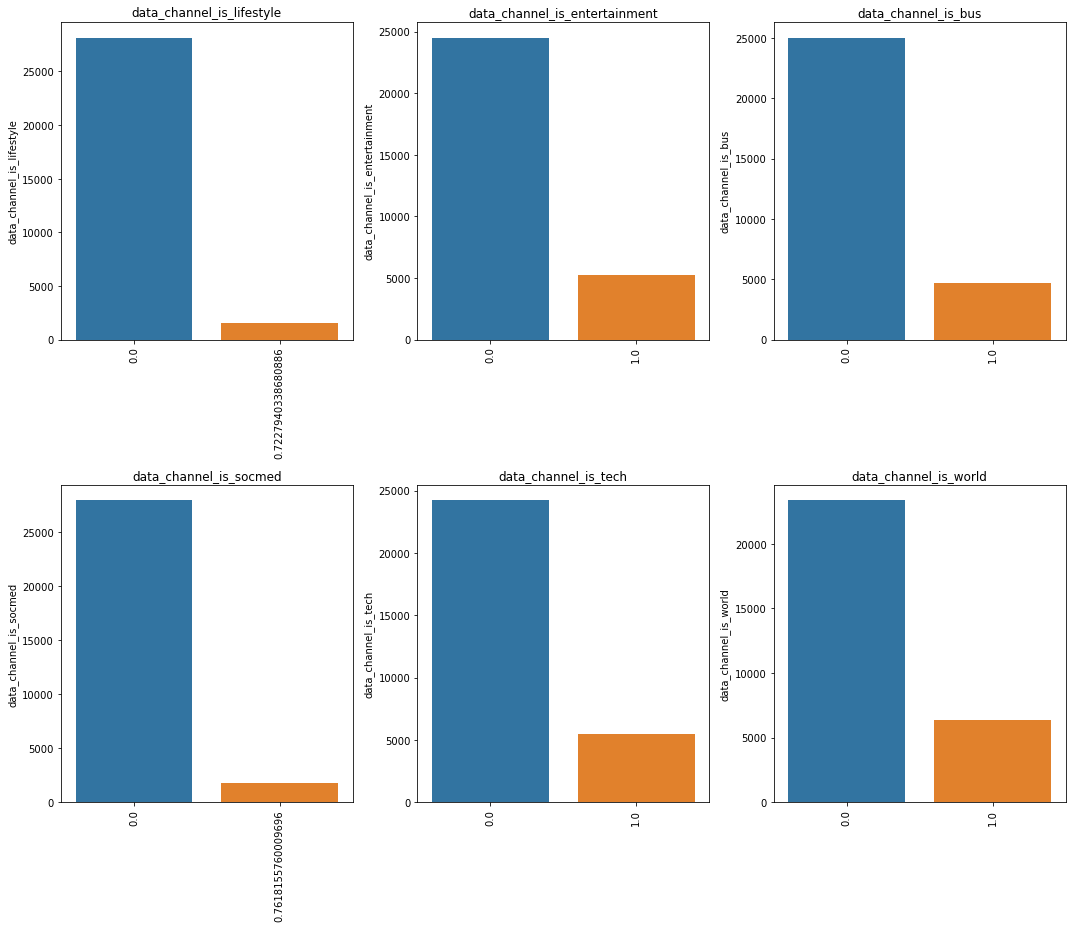

In [30]:
# Plotting bargraphs for categorical columns

# Creating a list of categorical columns to plot
categorical_cols1=['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','data_channel_is_world']

# Setting the figure size
plt.figure(figsize=(15,13))

for i in range(0,len(categorical_cols1)):
    # The categorical columns will be plotted in a 3x3 grid
    plt.subplot(2,3,i+1)
    plt.title(categorical_cols1[i])
    
    # Rotating the x axis labels for readability
    plt.xticks(rotation=90)
    
    # Plotting the subplot for each column
    sns.barplot(data[categorical_cols1[i]].value_counts().index, data[categorical_cols1[i]].value_counts())

# Evenly spacing the subplots
plt.tight_layout()

plt.show()

**Observations:**
- Most of news articles comprise of mostly 3 data channels - World,Technology and Entertainment. 
- Least number of news articles are published on Lifestyle and social media.

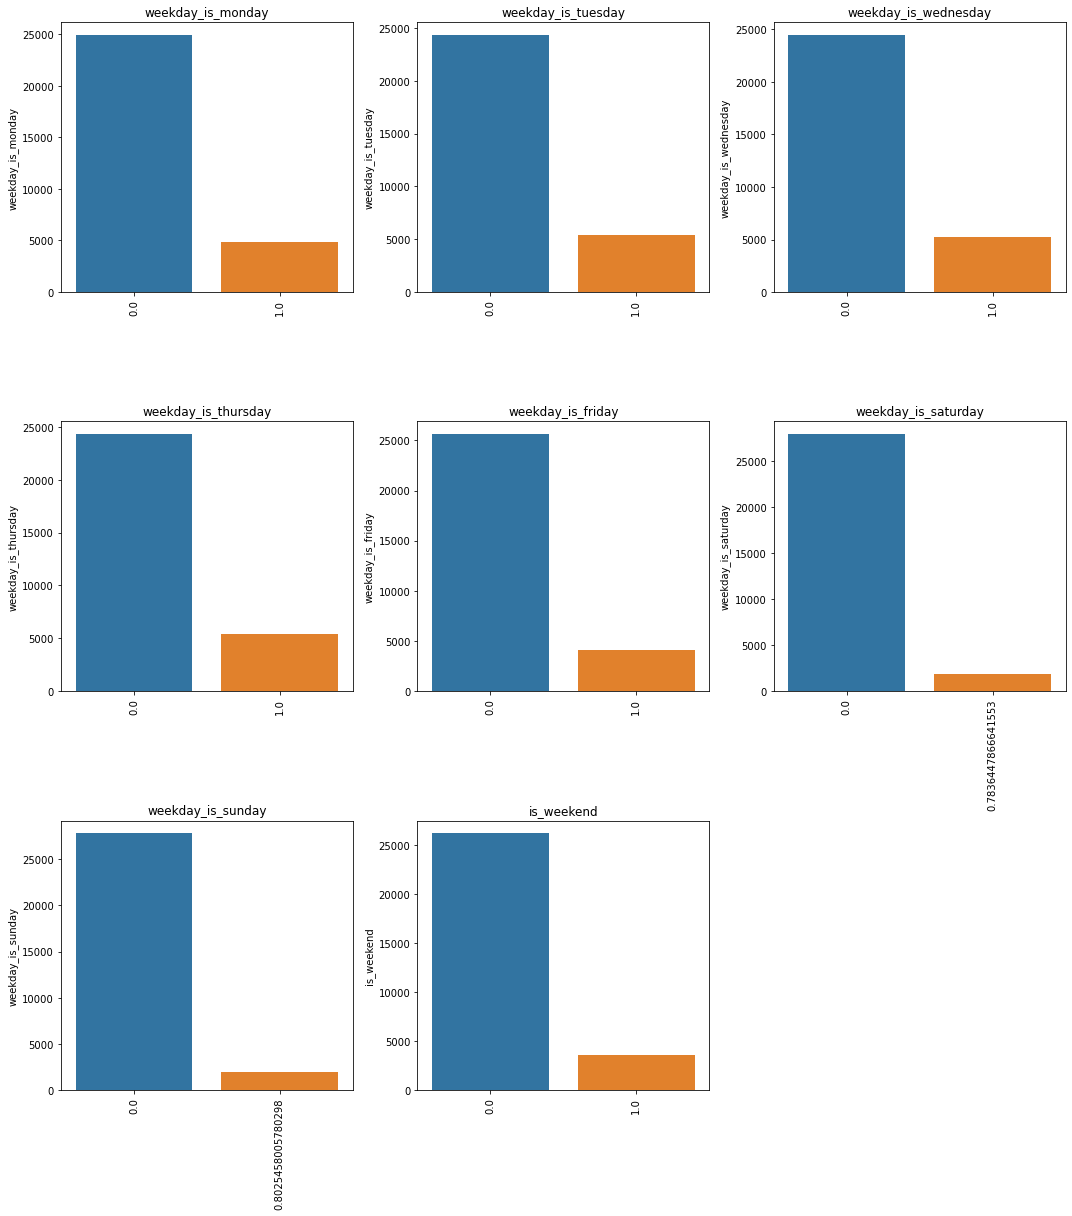

In [31]:
# Plotting bargraphs for categorical columns

# Creating a list of categorical columns to plot
categorical_cols2=['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday','weekday_is_saturday','weekday_is_sunday','is_weekend']

# Setting the figure size
plt.figure(figsize=(15,17))

for i in range(0,len(categorical_cols2)):
    # The categorical columns will be plotted in a 3x3 grid
    plt.subplot(3,3,i+1)
    plt.title(categorical_cols2[i])
    
    # Rotating the x axis labels for readability
    plt.xticks(rotation=90)
    
    # Plotting the subplot for each column
    sns.barplot(data[categorical_cols2[i]].value_counts().index, data[categorical_cols2[i]].value_counts())

# Evenly spacing the subplots
plt.tight_layout()

plt.show()

**Observations:**
- Most of the news articles are published on first four days of the week and very less count of articles are produced on weekends. This might be because the population might not be interested in news on weekends. 

### 3.2: Bivariate Analysis

#### 3.2.1: Bivariate analysis for Numerical Vs Numerical(Target) Columns

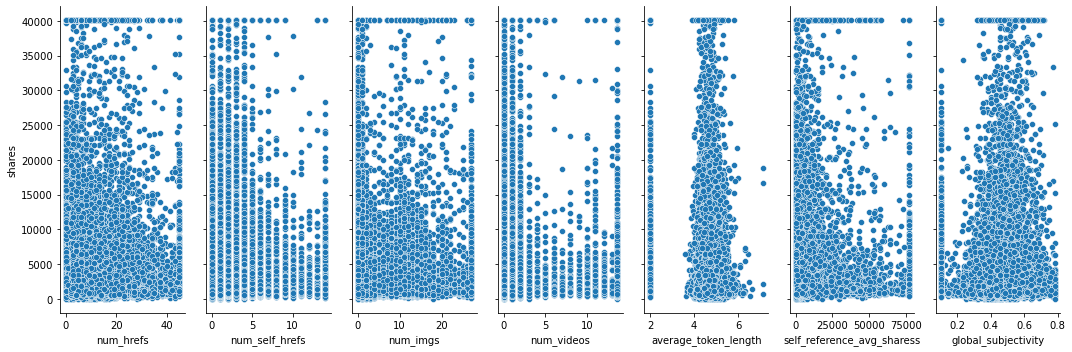

In [32]:
# Plotting a pairplot to analyze the numeric columns
g = sns.pairplot(data=data,x_vars=numerical_cols[2:], y_vars=['shares'],diag_kind = None)

# Setting the figure size
g.fig.set_size_inches(15,5)
plt.tight_layout()
plt.show()

**Observations:**
- For columns num_hrefs, num_self_hrefs, num_imgs - We can observe a pattern where as these columns increase the shares decrease i.e., as the reference links and images in the articles increase the share decrease i.e readers are less likely to read the article.
- For columns average_token_length, global_subjectivity - We can observe another pattern in the form of a triangle with a peak in the middle i.e the shares increase highly when these columns range between a certain value and then decrease suddenly when they are not in that range i.e these values help in undertanding the comfort of a news article reader. 

#### 3.2.2: Bivariate analysis for Categorical Vs Numerical(Target) Columns

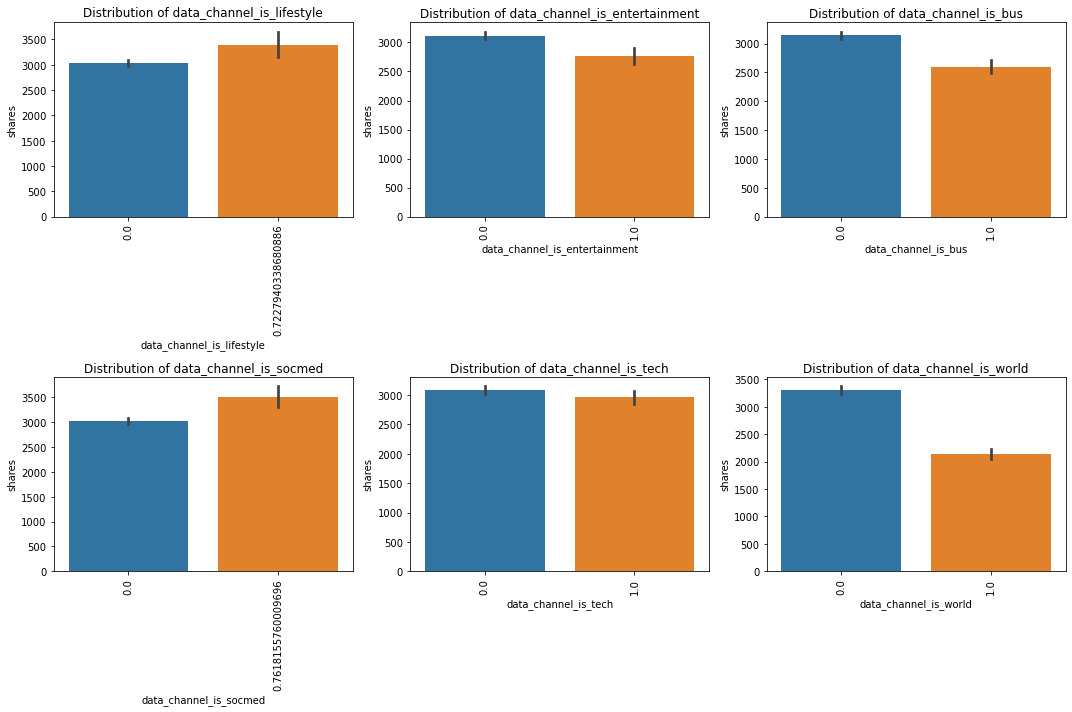

In [33]:
# Plotting categorical columns with Target variable
plt.figure(figsize=(15,10))

for i in range(0,len(categorical_cols1)):
    
    # Creating a 1x3 subplot
    plt.subplot(2,3,i+1)
    plt.title('Distribution of '+categorical_cols1[i])
    
    # Rotating the xticks for better readability
    plt.xticks(rotation=90)
    sns.barplot(data=data, x=categorical_cols1[i], y='shares')

plt.tight_layout()
plt.show()

**Observations:**
- For News articles with data channel as world, business have lower shares than other data channels. This means these topics are less relatable to the population than other data channels. 

### 3.3: Plotting correlation matrix

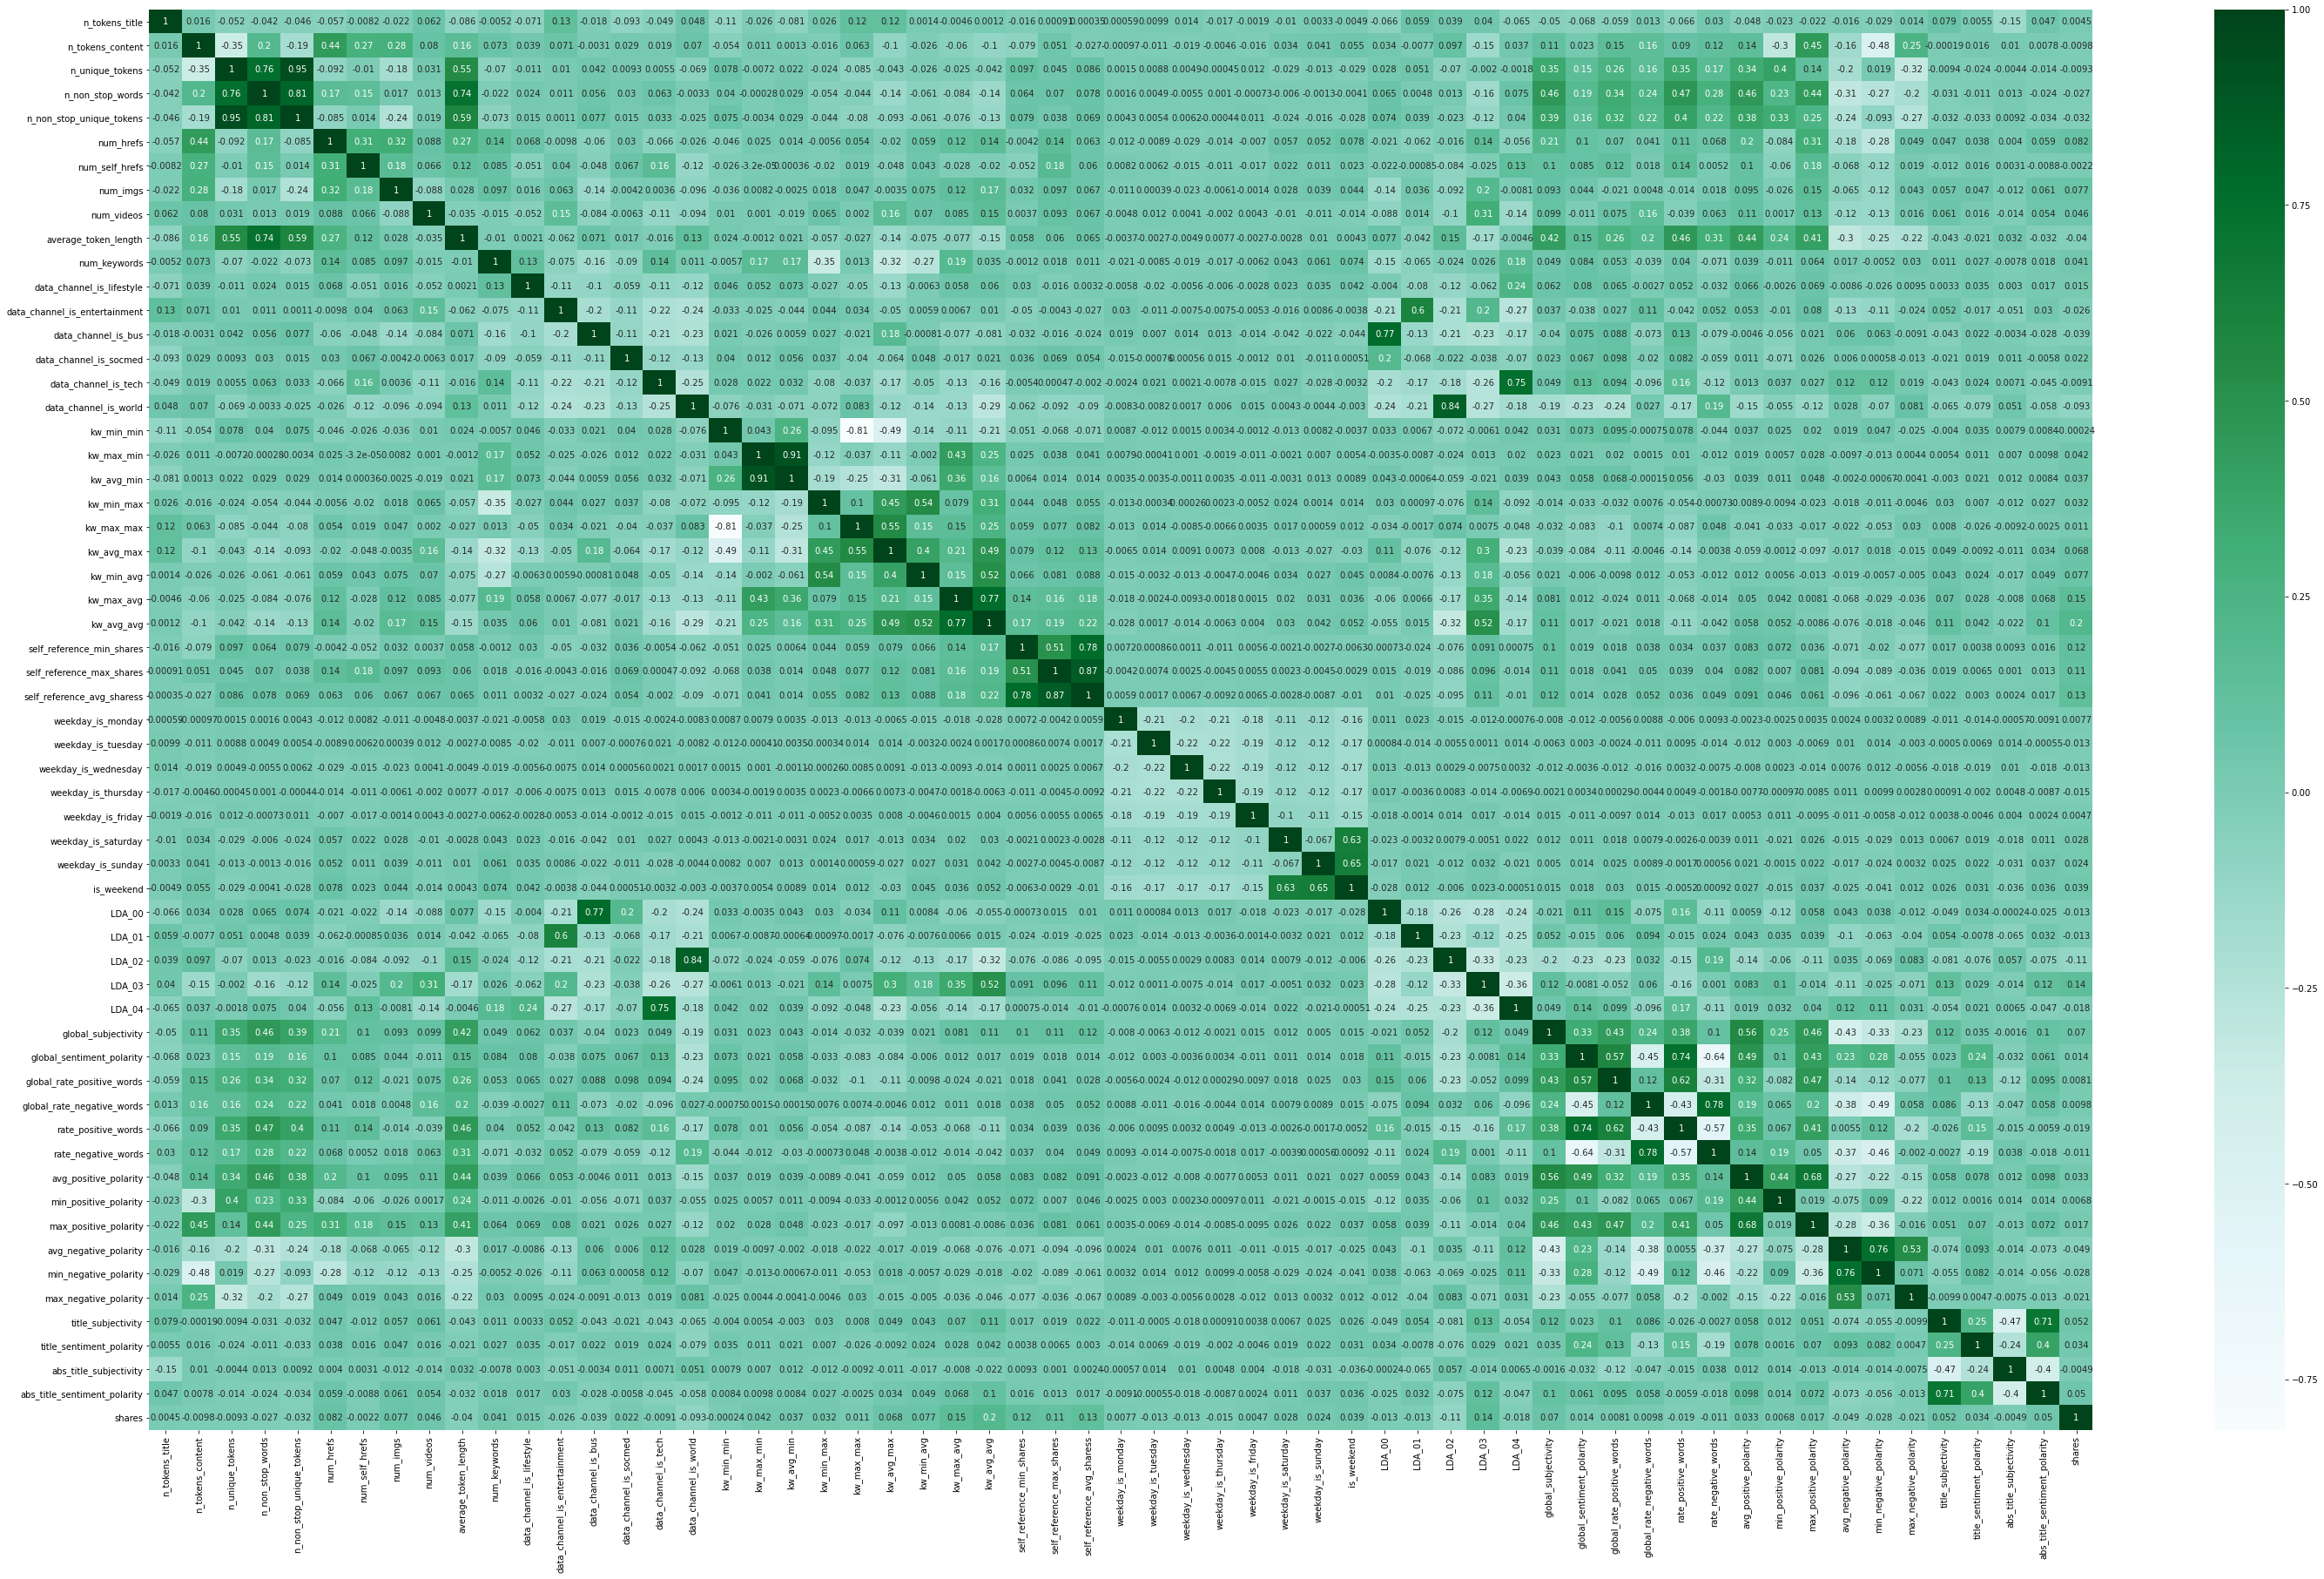

In [34]:
# # Plotting the correlation matrix for numerical columns
plt.figure(figsize = (50,30))
sns.heatmap(data.corr(), annot = True, cmap = 'BuGn')
plt.show()

**Observations:**
- We Do not Observe lot of columns with high correlation, the highly correlated columns will be dropped during the model building process. Hence, we wont be dropping any columns

## Step 4: Test-Train Split

In [35]:
# Putting feature variable to X
X = data.drop('shares', axis=1)
X.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,8.00000,211.00000,0.62981,1.00000,0.80000,6.00000,3.00000,0.00000,0.00000,4.60664,8.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,217.00000,2300.00000,797.71429,0.00000,617900.00000,115912.50000,0.00000,5103.04255,2568.64871,2000.00000,2000.00000,2000.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.02502,0.02505,0.02501,0.02538,0.89954,0.64742,0.18284,0.03318,0.00474,0.87500,0.12500,0.41344,0.10000,0.60000,-0.10000,-0.50000,-0.10000,1.00000,0.60000,0.50000,0.60000
1,12.00000,416.00000,0.60354,1.00000,0.66358,22.00000,7.00000,1.00000,13.60131,5.00481,7.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,4.00000,768.00000,259.40000,0.00000,843300.00000,169071.42857,0.00000,3339.79020,2112.66584,658.00000,13700.00000,4477.25000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.17098,0.02908,0.02857,0.74279,0.02857,0.44925,0.14891,0.03846,0.01536,0.80000,0.20000,0.32472,0.03333,1.00000,-0.22862,-0.50000,-0.07143,0.00000,0.00000,0.50000,0.00000
2,7.00000,229.00000,0.63839,1.00000,0.74648,9.00000,4.00000,1.00000,1.00000,4.82969,8.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,-1.00000,1100.00000,472.62500,4800.00000,843300.00000,204837.50000,1575.40000,3562.10163,2589.12548,4800.00000,0.00000,4800.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.02505,0.02504,0.02500,0.02500,0.89991,0.35321,0.11660,0.03493,0.02183,0.70968,0.38462,0.35455,0.05000,1.00000,-0.26083,-0.50000,-0.16667,0.00000,0.00000,0.50000,0.00000
3,9.00000,473.00000,0.54237,1.00000,0.75281,7.00000,0.00000,1.00000,1.00000,4.63425,7.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,-1.00000,447.00000,150.40000,0.00000,843300.00000,229728.57143,0.00000,3504.93380,2873.40067,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.02858,0.02858,0.02858,0.16685,0.74741,0.54896,0.25437,0.06554,0.01057,0.86111,0.13889,0.35625,0.13636,0.70000,-0.16750,-0.25000,-0.10000,0.00000,0.00000,0.50000,0.00000
4,13.00000,1097.00000,0.50521,1.00000,0.67634,10.00000,4.00000,14.00000,0.00000,4.67821,4.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,1200.00000,299.25000,33100.00000,843300.00000,381925.00000,2822.63518,5418.75000,3668.28564,1400.00000,2300.00000,2000.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.05000,0.05228,0.05015,0.79754,0.05004,0.43652,0.15679,0.04102,0.01003,0.80357,0.19643,0.36625,0.03333,1.00000,-0.19318,-0.31250,-0.10000,0.38333,0.16667,0.11667,0.16667


In [36]:
# Putting response variable to y
y = pd.DataFrame(data['shares'])
y.head()

,shares
0,36700.00000
1,24200.00000
2,945.00000
3,844.00000
4,551.00000


In [37]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3,random_state=100)

In [38]:
X_train

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
9514,8.00000,646.00000,0.46417,1.00000,0.66859,5.00000,0.00000,0.00000,0.00000,4.83127,5.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,-1.00000,1200.00000,355.75000,0.00000,843300.00000,445760.00000,0.00000,4674.23026,2832.52020,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.84000,0.04000,0.04000,0.04000,0.04000,0.47996,0.15218,0.05728,0.01238,0.82222,0.17778,0.36564,0.03333,0.80000,-0.41250,-0.80000,-0.05000,0.25000,0.40000,0.25000,0.40000
6518,13.00000,275.00000,0.56727,1.00000,0.71038,8.00000,4.00000,1.00000,2.00000,5.16364,10.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,-1.00000,753.00000,276.25900,1700.00000,843300.00000,312800.00000,1118.14286,5121.84811,2785.94240,1000.00000,1700.00000,1350.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.62004,0.02000,0.02045,0.02000,0.31951,0.45348,0.10173,0.03273,0.01455,0.69231,0.30769,0.32441,0.03333,0.60000,-0.14583,-0.16667,-0.12500,1.00000,-0.12500,0.50000,0.00000
25703,12.00000,201.00000,0.65285,1.00000,0.77236,1.00000,1.00000,1.00000,0.00000,4.48756,5.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,2300.00000,488.40000,2300.00000,843300.00000,385020.00000,2300.00000,4032.36292,3305.55007,1300.00000,1300.00000,1300.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.04154,0.04162,0.04027,0.83657,0.04000,0.57727,0.19375,0.08955,0.02488,0.78261,0.28000,0.35694,0.03333,0.80000,-0.23250,-0.40000,-0.18750,0.60000,0.09062,0.10000,0.09062
8179,11.00000,1625.00000,0.50913,1.00000,0.72239,15.00000,6.00000,22.00000,1.00000,4.72554,10.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,550.00000,205.95900,13900.00000,843300.00000,278260.00000,2290.31271,8609.52727,4527.19623,1900.00000,7600.00000,4700.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.02005,0.11796,0.02001,0.46006,0.38192,0.48443,0.18039,0.04492,0.01415,0.76042,0.23958,0.39548,0.05000,1.00000,-0.28541,-0.50000,-0.05000,1.00000,-0.50000,0.50000,0.50000
13694,12.00000,526.00000,0.55621,1.00000,0.71171,28.00000,10.00000,13.00000,1.00000,4.65970,8.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,651.00000,128.69875,1900.00000,843300.00000,386625.00000,1094.44444,6825.36647,3724.31495,603.00000,6800.00000,2256.11111,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.02500,0.02533,0.02503,0.89965,0.02500,0.38849,0.07008,0.03232,0.01901,0.62963,0.37037,0.42812,0.10000,1.00000,-0.24345,-0.60000,-0.07143,0.73333,0.43333,0.23333,0.43333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12119,9.00000,423.00000,0.59446,1.00000,0.75794,22.00000,2.00000,20.00000,1.00000,4.63830,6.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,339.00000,163.6666

In [39]:
# Resetting indexes after splitting the dataset
X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

## Step 5: Feature Scaling

### 5.1: Feature Scaling using Standard scaler

In [40]:
# Creating a list of columns present in train dataset
cols=X_train.columns

In [41]:
# Creating a StandardScaler object
scaler = StandardScaler()

# Applying fit_transform on the 'train' dataset
X_train[cols] = scaler.fit_transform(X_train)

# Applying transform on the 'test' and 'unseen' dataset
X_test[cols] = scaler.transform(X_test)
unseen[cols] = scaler.transform(unseen)

In [42]:
# Inspecting the dataframe after scaling
X_train

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,-1.13990,0.27107,-0.42200,0.13657,-0.03607,-0.56054,-0.93117,-0.55684,-0.38691,0.41868,-1.16695,-0.23452,-0.46376,2.30369,-0.24724,-0.47580,-0.52157,-0.37960,0.11865,0.23034,-0.39413,0.41910,1.39954,-0.99414,-0.22459,-0.25387,-0.42781,-0.47266,-0.50797,-0.44025,2.12173,-0.46330,-0.47785,-0.39905,-0.25769,-0.25885,-0.36670,2.47753,-0.46711,-0.62678,-0.61952,-0.66701,0.32562,0.35615,1.05403,-0.40780,0.77655,-0.72396,0.11406,-1.01674,0.17643,-1.26100,-0.96866,0.70454,-0.09746,1.30487,-0.51183,1.20257
1,1.23215,-0.62896,0.21856,0.13657,0.20621,-0.23713,0.48194,-0.39034,0.37728,1.03668,1.46068,-0.23452,-0.46376,2.30369,-0.24724,-0.47580,-0.52157,-0.37960,-0.17377,-0.05556,-0.33062,0.41910,0.40143,-0.00425,-0.08082,-0.29806,-0.30201,-0.37416,-0.38283,-0.44025,2.12173,-0.46330,-0.47785,-0.39905,-0.25769,-0.25885,-0.36670,1.64501,-0.56183,-0.69570,-0.68728,0.30000,0.06234,-0.18096,-0.40147,-0.19254,0.04010,0.12644,-0.30989,-1.01674,-0.63515,0.91230,1.23258,-0.29179,2.22155,-0.76830,0.81804,-0.68437
2,0.75774,-0.80848,0.75027,0.13657,0.56548,-0.99176,-0.57789,-0.39034,-0.38691,-0.22040,-1.16695,-0.23452,2.15629,-0.43409,-0.24724,-0.47580,-0.52157,-0.37960,0.83824,0.70741,-0.30820,0.41910,0.94357,1.04204,-0.43075,0.19491,-0.26427,-0.39733,-0.38746,-0.44025,-0.47131,2.15842,-0.47785,-0.39905,-0.25769,-0.25885,-0.36670,-0.54459,-0.45944,-0.62584,2.07895,-0.66701,1.29353,0.79875,2.96776,0.83620,0.55199,-0.05483,0.02467,-1.01674,0.17643,0.20598,0.42159,-1.12206,0.98475,0.08318,-1.30976,-0.25686
3,0.28333,2.64609,-0.14272,0.13657,0.27581,0.51751,1.18850,3.10614,-0.00481,0.22209,1.46068,-0.23452,-0.46376,-0.43409,-0.24724,-0.47580,-0.52157,-0.37960,-0.30657,-0.30839,0.12517,0.41910,0.14214,1.03347,1.03937,1.35392,-0.18879,-0.03229,-0.07229,-0.44025,-0.47131,-0.46330,-0.47785,-0.39905,-0.25769,-0.25885,-0.36670,-0.62592,-0.09796,-0.69723,0.80346,0.51592,0.37016,0.65652,0.32164,-0.23154,0.42619,-0.31939,0.42097,-0.73329,0.98802,-0.22525,0.07403,0.70454,2.22155,-2.24914,0.81804,1.67431
4,0.75774,-0.02004,0.14985,0.13657,0.21392,1.91897,2.60161,1.60765,-0.00481,0.09966,0.40963,-0.23452,2.15629,-0.43409,-0.24724,-0.47580,-0.52157,-0.37960,-0.24050,-0.58626,-0.32315,0.41910,0.95562,-0.02523,0.46632,0.59220,-0.35195,-0.07864,-0.29883,-0.44025,2.12173,-0.46330,-0.47785,-0.39905,-0.25769,-0.25885,-0.36670,-0.60719,-0.53661,-0.67956,2.29263,-0.71891,-0.58413,-0.51792,-0.42565,0.25221,-0.31520,0.53673,0.75659,0.11704,0.98802,0.11672,-0.27353,0.41987,1.39701,1.43650,-0.60049,1.35982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20808,-0.66549,-0.26992,0.38747,0.13657,0.48188,1.27214,-0.22461,2.77314,-0.00481,0.05988,-0.64143,-0.23452,-0.46376,-0.43409,-0.24724,-0.47580,-0.52157,-0.37960,-0.44460,-0.46050,0.12517,0.41910,1.36856,2.09608,0.71258,2.27

## Step 6: Model Building using PCA

### 6.1: Performing PCA for dimensionality reduction

In [43]:
# Checking the shape of train dataset before applying PCA
X_train.shape

(20813, 58)

In [44]:
# Creating a PCA object
pca_1 = PCA(random_state=100)

In [45]:
# Applying fit on train dataset
pca_1.fit(X_train)

PCA(random_state=100)

In [46]:
# Checking the components of PCA
pca_1.components_

array([[-4.03610685e-02,  7.78974360e-02,  2.73854461e-01, ...,
         3.05203421e-02, -1.35706059e-02,  3.77342753e-02],
       [ 6.54441265e-02,  5.19610689e-02, -3.13766243e-02, ...,
        -4.14861197e-02, -2.90597723e-02,  7.73002988e-02],
       [ 1.69861981e-02,  8.10703690e-02,  7.62709330e-02, ...,
        -1.51505903e-01,  6.88118375e-02, -9.83094537e-02],
       ...,
       [ 4.96731880e-04,  4.10723982e-03,  1.48282524e-02, ...,
        -1.22124326e-03, -1.64618765e-03, -1.53102335e-04],
       [ 9.75369673e-05,  1.30843579e-01,  7.17838701e-01, ...,
         2.33424357e-03,  2.80878314e-03, -2.75662859e-03],
       [-4.49843159e-04,  9.37392289e-05, -2.12681296e-03, ...,
         2.15649314e-04, -3.01738151e-04, -6.13160522e-05]])

Looking at the explained variance ratio for each component

In [47]:
# Checking the explained_variance_ratio for PCA for all columns in dataframe
pca_1.explained_variance_ratio_

array([9.58473658e-02, 7.31044276e-02, 6.64191567e-02, 5.30186646e-02,
       4.65161989e-02, 4.34839131e-02, 3.94366376e-02, 3.61693751e-02,
       3.54300941e-02, 3.36800149e-02, 3.19420358e-02, 2.80146665e-02,
       2.43484647e-02, 2.27907732e-02, 2.13463035e-02, 2.12595516e-02,
       2.09226671e-02, 2.06097594e-02, 2.01721275e-02, 2.00342461e-02,
       1.88824031e-02, 1.85393354e-02, 1.77495581e-02, 1.54870348e-02,
       1.51105674e-02, 1.31243267e-02, 1.21379123e-02, 1.10421306e-02,
       1.07488574e-02, 9.65585600e-03, 9.27242205e-03, 9.17930947e-03,
       8.34643584e-03, 7.90294542e-03, 7.45242452e-03, 7.01626180e-03,
       6.64562148e-03, 5.68582714e-03, 5.32790807e-03, 4.48053410e-03,
       4.16112546e-03, 3.94914945e-03, 3.51566347e-03, 3.31188299e-03,
       2.81372779e-03, 1.96334509e-03, 1.64998077e-03, 1.61817956e-03,
       1.49117363e-03, 1.27895179e-03, 1.13634498e-03, 1.09258187e-03,
       9.39436753e-04, 9.14688731e-04, 8.77304054e-04, 6.27815796e-04,
      

Text(0.5, 0, 'Principal Component')

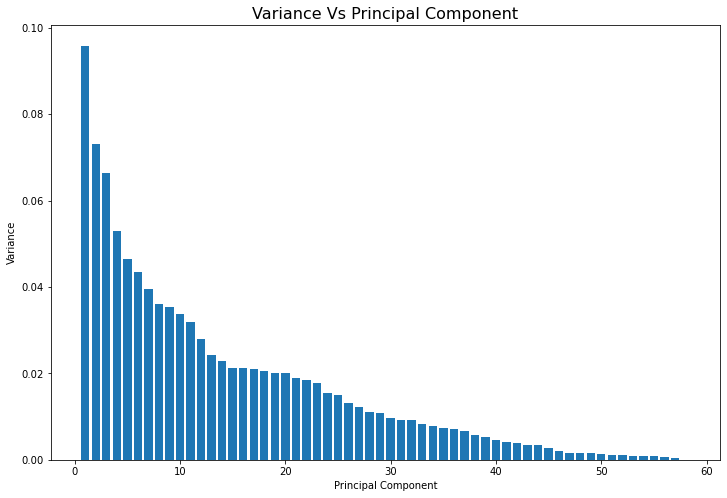

In [48]:
# Plotting the variance of the components created by PCA
fig = plt.figure(figsize=[12,8])
plt.bar(range(1,len(pca_1.explained_variance_ratio_)+1), pca_1.explained_variance_ratio_)
plt.title('Variance Vs Principal Component', fontdict = {'fontsize':16})
plt.ylabel("Variance")
plt.xlabel("Principal Component")

**Observations:**
- We can observe from the graph that around 45 principal components explain a great part of variance in the dataset.
- The remaining components have little to no variance and the variance decreases after 45.

**Making a scree plot for the explained variance**

In [49]:
# Performing a cumulative summation of variance explained by components
var_cumu = np.cumsum(pca_1.explained_variance_ratio_)

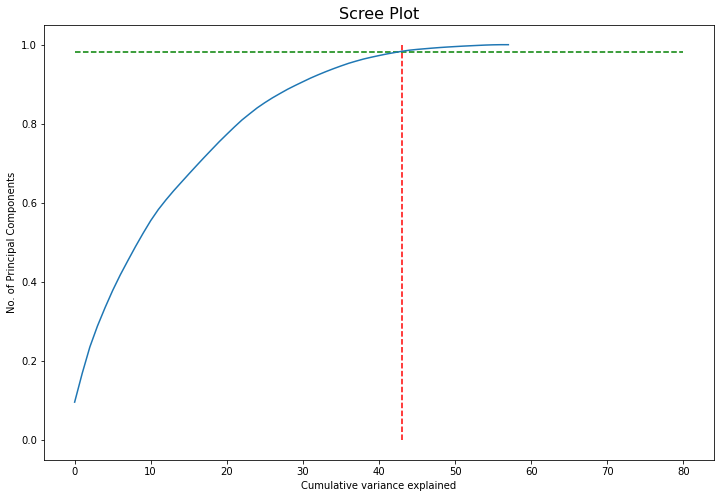

In [50]:
# Plotting a graph with components and the cumulative variance explained by them
fig = plt.figure(figsize=[12,8])
plt.vlines(x=43, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.982, xmax=80, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.title('Scree Plot', fontdict = {'fontsize':16})
plt.xlabel("Cumulative variance explained")
plt.ylabel("No. of Principal Components")
plt.show()

**Observations:**
- We can observe that 98% of variance can be explained by 43 principal components.
- We initially had 60 columns and now we can use only 43 components for model building which is an advantage with PCA.
- Dimensionality reduced by half after performing PCA and we could retain 98% of information.

### 6.2: Performing IncrementalPCA with 43 components

In [51]:
# Performing IncrementalPCA with 66 components
pca_2 = IncrementalPCA(n_components=43)

In [52]:
# Applying fit_transform on train dataset
X_train_pca2 = pca_2.fit_transform(X_train)

In [53]:
# Checking the shape after applying PCA
X_train_pca2.shape

(20813, 43)

In [54]:
# Creating a correlation matrix on the PCA train dataset
corrmat = np.corrcoef(X_train_pca2.transpose())

In [55]:
corrmat.shape

(43, 43)

<AxesSubplot:>

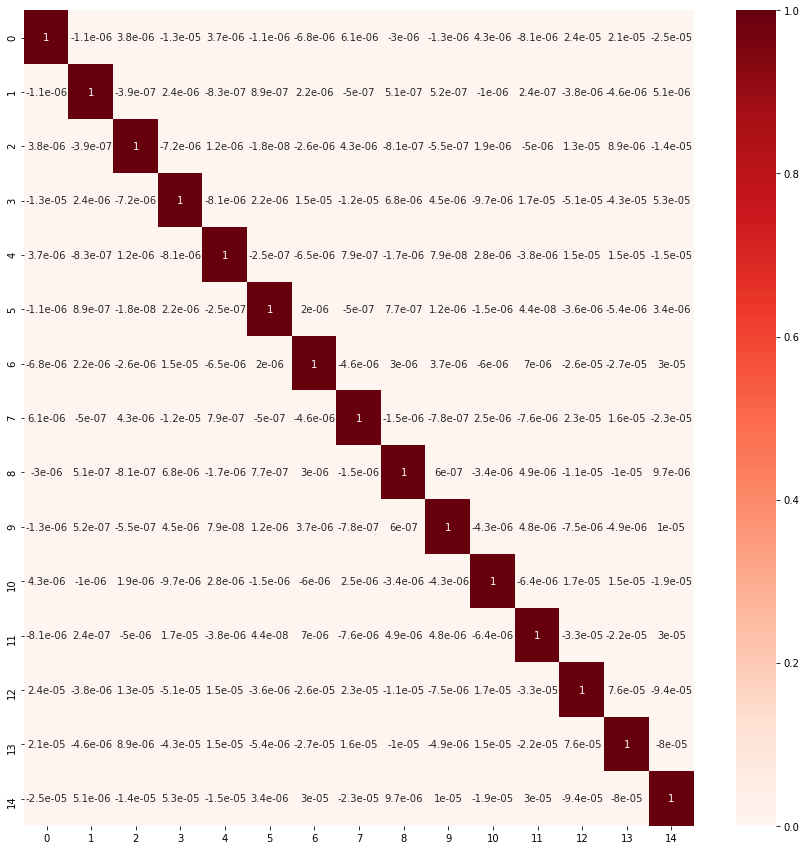

In [56]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat[:15,:15], annot=True,cmap='Reds',fmt='.2g')

**Observations:**
- We can observe that no boxes appear dark i.e. there is no significant correlation.
- This is because PCA removes multicollinearity between the features. Hence, the features will not have any correlation with each other.

**Applying the PCA transformation on the test set**

In [57]:
# Applying PCA Transform on test dataset
X_test_pca2 = pca_2.transform(X_test)
X_test_pca2.shape

(8920, 43)

In [58]:
# Creating a funcion to fill the column names for the principal componenets created
def col_fill(length):
    l=[]
    for i in range(0,length):
        l=l+['PC'+str(i)]
    return l

In [59]:
# Converting the pca transformed arrays to pandas dataframes
X_train_final=pd.DataFrame(X_train_pca2)
X_test_final=pd.DataFrame(X_test_pca2)

# Filling the column name for the dataframes created
X_train_final.columns=col_fill(X_train_pca2.shape[1])
X_test_final.columns=col_fill(X_test_pca2.shape[1])

### 6.3: Applying Linear Regression on PCA dataset

#### 6.3.1: Running First model

In [60]:
X_train_lm = sm.add_constant(X_train_final)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     35.05
Date:                Tue, 09 Nov 2021   Prob (F-statistic):          2.51e-277
Time:                        10:11:45   Log-Likelihood:            -2.0678e+05
No. Observations:               20813   AIC:                         4.137e+05
Df Residuals:                   20769   BIC:                         4.140e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3071.3528     34.664     88.604      0.000    3003.409    3139.297
PC0           63.3480     14.702      4.309      0.000      34.531      92.165
PC1          381.8050     16.834     22.680      0.000     348.809     414.801
PC2         -356.8251     17.661    -20.204      0.000    -391.442    -322.208
PC3          118.9674     19.767      6.018      0.000      80.222     157.713
PC4          242.7616     21.104     11.503      0.000     201.396     284.127
PC5          148.4478     21.827      6.801      0.000     105.665     191.231
PC6           16.9215     22.920      0.738      0.460     -28.003      61.846
PC7           33.6859     23.933      1.408      0.159     -13.224      80.596
PC8          104.6492     24.181      4.328      0.000      57.252     152.046
PC9          131.2577     24.801      5.292      0.000      82.645     179.871
PC10          -3.5154     25.467     -0.138      0.890     -53.433      46.402
PC11         162.6573     27.194      5.981      0.000     109.355     215.959
PC12        -157.1186     29.170     -5.386      0.000    -214.293     -99.944
PC13         -27.2677     30.150     -0.904      0.366     -86.364      31.828
PC14         -23.0024     31.153     -0.738      0.460     -84.065      38.061
PC15           8.3177     31.217      0.266      0.790     -52.870      69.505
PC16         -74.4674     31.467     -2.367      0.018    -136.145     -12.790
PC17         -39.2089     31.705     -1.237      0.216    -101.353      22.936
PC18          96.5429     32.047      3.013      0.003      33.728     159.358
PC19          42.1044     32.157      1.309      0.190     -20.927     105.135
PC20          33.6903     33.124      1.017      0.309     -31.235      98.616
PC21          41.7566     33.429      1.249      0.212     -23.766     107.279
PC22         -38.8155     34.164     -1.136      0.256    -105.780      28.150
PC23          68.1183     36.575      1.862      0.063      -3.571     139.807
PC24        -242.1650     37.028     -6.540      0.000    -314.742    -169.588
PC25         150.9218     39.733      3.798      0.000      73.043     228.801
PC26          94.7636     41.314      2.294      0.022      13.784     175.743
PC27        -219.8374     43.315     -5.075      0.000    -304.738    -134.937
PC28         159.0237     43.902      3.622      0.000      72.972     245.075
PC29        -136.7938     46.326     -2.953      0.003    -227.597     -45.991
PC30        -110.0082     47.271     -2.327      0.020    -202.663     -17.353
PC31         229.1467     47.508      4.823      0.000     136.028     322.265
PC32         131.1466     49.830      2.632      0.008      33.476     228.817
PC33        -203.2888     51.213     -3.970      0.000    -303.670    -102.908
PC34          34.4641     52.730      0.654      0.513     -68.892     137.820
PC

In [61]:
# Calculating the VIF for the model
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

,Features,VIF
0,const,1.00000
1,PC0,1.00000
24,PC23,1.00000
25,PC24,1.00000
26,PC25,1.00000


As we have performed PCA the VIF will be 1 for all columns hence we will not be checking VIF.
<br>
Dropping the columns with p values>0.5

In [62]:
col=X_train_final.columns
col=col.drop(['PC10','PC15','PC34','PC39','PC42'],1)

#### 6.3.2: Running Second model

In [63]:
X_train_lm = sm.add_constant(X_train_final[col])
lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     39.65
Date:                Tue, 09 Nov 2021   Prob (F-statistic):          3.79e-281
Time:                        10:11:48   Log-Likelihood:            -2.0678e+05
No. Observations:               20813   AIC:                         4.136e+05
Df Residuals:                   20774   BIC:                         4.140e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3071.3528     34.660     88.613      0.000    3003.416    3139.290
PC0           63.3476     14.700      4.309      0.000      34.534      92.161
PC1          381.8050     16.832     22.683      0.000     348.812     414.798
PC2         -356.8254     17.659    -20.206      0.000    -391.439    -322.212
PC3          118.9686     19.765      6.019      0.000      80.227     157.710
PC4          242.7610     21.102     11.504      0.000     201.400     284.122
PC5          148.4479     21.825      6.802      0.000     105.669     191.227
PC6           16.9223     22.918      0.738      0.460     -27.998      61.843
PC7           33.6853     23.930      1.408      0.159     -13.220      80.591
PC8          104.6496     24.179      4.328      0.000      57.258     152.042
PC9          131.2575     24.799      5.293      0.000      82.650     179.865
PC11         162.6585     27.191      5.982      0.000     109.362     215.955
PC12        -157.1219     29.166     -5.387      0.000    -214.291     -99.953
PC13         -27.2707     30.147     -0.905      0.366     -86.361      31.819
PC14         -22.9992     31.150     -0.738      0.460     -84.056      38.057
PC16         -74.4672     31.464     -2.367      0.018    -136.139     -12.796
PC17         -39.2106     31.702     -1.237      0.216    -101.349      22.927
PC18          96.5410     32.044      3.013      0.003      33.733     159.349
PC19          42.1001     32.154      1.309      0.190     -20.924     105.124
PC20          33.6842     33.120      1.017      0.309     -31.234      98.603
PC21          41.7591     33.425      1.249      0.212     -23.757     107.275
PC22         -38.8097     34.161     -1.136      0.256    -105.768      28.148
PC23          68.1184     36.571      1.863      0.063      -3.563     139.800
PC24        -242.1601     37.024     -6.541      0.000    -314.730    -169.590
PC25         150.9114     39.729      3.799      0.000      73.040     228.782
PC26          94.7713     41.310      2.294      0.022      13.801     175.742
PC27        -219.8358     43.310     -5.076      0.000    -304.728    -134.944
PC28         159.0175     43.897      3.622      0.000      72.975     245.060
PC29        -136.8072     46.321     -2.953      0.003    -227.601     -46.013
PC30        -110.0248     47.266     -2.328      0.020    -202.670     -17.380
PC31         229.1552     47.503      4.824      0.000     136.046     322.264
PC32         131.1658     49.825      2.633      0.008      33.505     228.826
PC33        -203.2664     51.207     -3.969      0.000    -303.637    -102.896
PC35        -278.9149     54.403     -5.127      0.000    -385.549    -172.281
PC36          89.8368     55.831      1.609      0.108     -19.595     199.269
PC37         -82.5269     60.660     -1.360      0.174    -201.426      36.372
PC

Dropping p-values>0.1 and running the model

In [64]:
col=col.drop(['PC6','PC7','PC13','PC14','PC17','PC19','PC20','PC21','PC22','PC37'],1)

#### 6.3.3: Running Third model

In [65]:
X_train_lm = sm.add_constant(X_train_final[col])
lr_3 = sm.OLS(y_train, X_train_lm).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     53.35
Date:                Tue, 09 Nov 2021   Prob (F-statistic):          8.96e-287
Time:                        10:11:48   Log-Likelihood:            -2.0679e+05
No. Observations:               20813   AIC:                         4.136e+05
Df Residuals:                   20784   BIC:                         4.139e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3071.3528     34.663     88.607      0.000    3003.411    3139.294
PC0           63.3548     14.701      4.309      0.000      34.539      92.171
PC1          381.8034     16.834     22.681      0.000     348.808     414.799
PC2         -356.8211     17.660    -20.205      0.000    -391.437    -322.205
PC3          118.9479     19.767      6.018      0.000      80.204     157.692
PC4          242.7664     21.103     11.504      0.000     201.403     284.130
PC5          148.4460     21.826      6.801      0.000     105.664     191.228
PC8          104.6450     24.180      4.328      0.000      57.250     152.040
PC9          131.2507     24.801      5.292      0.000      82.640     179.862
PC11         162.6404     27.193      5.981      0.000     109.340     215.941
PC12        -157.0666     29.168     -5.385      0.000    -214.239     -99.894
PC16         -74.4798     31.466     -2.367      0.018    -136.155     -12.804
PC18          96.5725     32.046      3.014      0.003      33.760     159.385
PC23          68.1052     36.573      1.862      0.063      -3.581     139.792
PC24        -242.2438     37.026     -6.542      0.000    -314.818    -169.669
PC25         151.1052     39.731      3.803      0.000      73.229     228.981
PC26          94.6544     41.313      2.291      0.022      13.678     175.631
PC27        -219.8556     43.313     -5.076      0.000    -304.753    -134.958
PC28         159.0442     43.900      3.623      0.000      72.996     245.093
PC29        -136.5212     46.324     -2.947      0.003    -227.320     -45.722
PC30        -109.7992     47.269     -2.323      0.020    -202.451     -17.148
PC31         229.0605     47.506      4.822      0.000     135.945     322.176
PC32         130.8429     49.828      2.626      0.009      33.177     228.509
PC33        -203.6462     51.210     -3.977      0.000    -304.022    -103.270
PC35        -279.7867     54.404     -5.143      0.000    -386.423    -173.151
PC36          90.0193     55.834      1.612      0.107     -19.420     199.459
PC38         183.0039     62.354      2.935      0.003      60.785     305.223
PC40         135.0586     70.583      1.913      0.056      -3.289     273.407
PC41        -168.1575     72.578     -2.317      0.021    -310.415     -25.900
==============================================================================
Omnibus:                    18962.010   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           619777.013
Skew:                           4.496   Prob(JB):                         0.00
Kurtosis:                      28.176   Cond. No.                         4.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

Dropping P Values>0.05 and running the model

In [66]:
col=col.drop(['PC36','PC23','PC40'],1)

#### 6.3.4: Running Fourth model

In [67]:
X_train_lm = sm.add_constant(X_train_final[col])
lr_4 = sm.OLS(y_train, X_train_lm).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     59.34
Date:                Tue, 09 Nov 2021   Prob (F-statistic):          2.39e-287
Time:                        10:11:48   Log-Likelihood:            -2.0679e+05
No. Observations:               20813   AIC:                         4.136e+05
Df Residuals:                   20787   BIC:                         4.138e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3071.3528     34.668     88.593      0.000    3003.400    3139.305
PC0           63.3546     14.704      4.309      0.000      34.534      92.175
PC1          381.8035     16.836     22.677      0.000     348.803     414.804
PC2         -356.8207     17.663    -20.201      0.000    -391.442    -322.199
PC3          118.9488     19.770      6.017      0.000      80.198     157.699
PC4          242.7661     21.107     11.502      0.000     201.396     284.136
PC5          148.4460     21.830      6.800      0.000     105.657     191.235
PC8          104.6452     24.184      4.327      0.000      57.242     152.048
PC9          131.2520     24.805      5.291      0.000      82.633     179.871
PC11         162.6414     27.197      5.980      0.000     109.333     215.950
PC12        -157.0680     29.173     -5.384      0.000    -214.250     -99.886
PC16         -74.4777     31.471     -2.367      0.018    -136.163     -12.792
PC18          96.5707     32.051      3.013      0.003      33.748     159.393
PC24        -242.2406     37.032     -6.541      0.000    -314.827    -169.654
PC25         151.0947     39.737      3.802      0.000      73.206     228.983
PC26          94.6558     41.319      2.291      0.022      13.666     175.645
PC27        -219.8575     43.320     -5.075      0.000    -304.769    -134.946
PC28         159.0548     43.908      3.622      0.000      72.993     245.117
PC29        -136.5389     46.332     -2.947      0.003    -227.353     -45.725
PC30        -109.7931     47.277     -2.322      0.020    -202.459     -17.127
PC31         229.0601     47.514      4.821      0.000     135.930     322.190
PC32         130.8678     49.836      2.626      0.009      33.186     228.550
PC33        -203.6268     51.218     -3.976      0.000    -304.019    -103.235
PC35        -279.7435     54.413     -5.141      0.000    -386.397    -173.090
PC38         183.0603     62.364      2.935      0.003      60.821     305.299
PC41        -168.2192     72.589     -2.317      0.020    -310.500     -25.939
==============================================================================
Omnibus:                    18966.781   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           620466.375
Skew:                           4.498   Prob(JB):                         0.00
Kurtosis:                      28.190   Cond. No.                         4.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 6.3.5: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [68]:
y_train_pred = lr_4.predict(X_train_lm)

Text(0.5, 0, 'Errors')

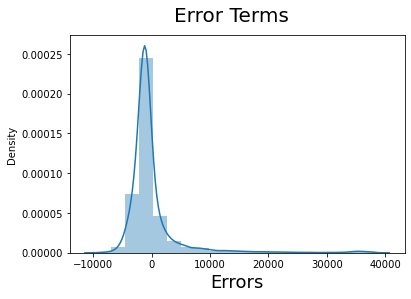

In [69]:
# Plot the histogram of the error terms
residuals_train=y_train.values.reshape(1,-1)-y_train_pred.values
fig = plt.figure()
sns.distplot(residuals_train, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0, 0.5, 'Residuals')

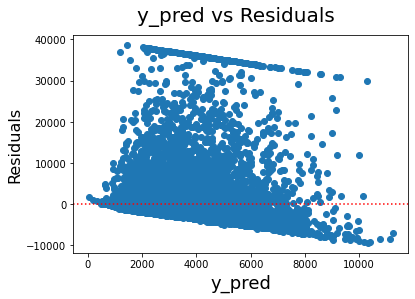

In [70]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_train_pred.values, residuals_train)
plt.axhline(y=0, color='r', linestyle=':')
fig.suptitle('y_pred vs Residuals', fontsize = 20)              # Plot heading 
plt.xlabel('y_pred', fontsize = 18)                          # X-label
plt.ylabel('Residuals', fontsize = 16)   

In [71]:
# Metrics to give an overall sense of error in the model
r2_train=r2_score(y_train, y_train_pred)
print('R2_Score',r2_train)

rss_train = np.sum(np.square(residuals_train))
print('RSS:',rss_train)

mse_train = mean_squared_error(y_train, y_train_pred)
print('Mean Squared Error:',mse_train)

rmse_train = mse_train**0.5
print('RMSE:',rmse_train)

R2_Score 0.06661202466372329
RSS: 519985967671.4672
Mean Squared Error: 24983710.54972696
RMSE: 4998.370789540024


#### 6.3.6: Predicting values on test set

In [72]:
X_test_lm=sm.add_constant(X_test_final[col])
y_test_pred = lr_4.predict(X_test_lm)

In [73]:
residuals_test=y_test.values.reshape(1,-1)-y_test_pred.values
# Metrics to give an overall sense of error in the model
r2_test=r2_score(y_test, y_test_pred)
print('R2_Score',r2_test)

rss_test = np.sum(np.square(residuals_test))
print('RSS:',rss_test)

mse_test = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error:',mse_test)

rmse_test = mse_test**0.5
print('RMSE:',rmse_test)

R2_Score 0.050343343979286304
RSS: 212061477402.93536
Mean Squared Error: 23773708.229028627
RMSE: 4875.828978648516


In [74]:
# Creating a list of all the metrics obtained in the linear regression model
lr_metrics=[r2_train,r2_test,rss_train,rss_test,mse_train,mse_test,rmse_train,rmse_test]

**Observations:**
- We can observe the metrics are close for both train and test predictions.
- Also, the distribution of error terms for train prediction doesnot seem like a normal distribution.
- We can also observe there is some pattern in the plot for y_pred vs Residuals. 
- These are one of the major assumptions of linear model. This might be because the relation between the features and target variable is not linear. We will perform ridge and lasso rigression for for better RMSE Score.

### 6.4: Applying Ridge Regression on PCA dataset

In [75]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Creating a Ridge object
ridge = Ridge()

# cross validation for Ridge Regression
folds = 5
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train_final, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [76]:
# Printing the best hyperparameter alpha
print(ridge_cv.best_params_['alpha'])

500


In [77]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = ridge_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_final, y_train)
print(ridge.coef_)

[[  63.07662706  379.6537135  -354.61281085  118.04217921  240.61962171
   147.04676125   16.74422166   33.30650039  103.43932761  129.662618
    -3.46907502  160.28457527 -154.48208732  -26.77445998  -22.57300796
     8.15388678  -73.02253549  -38.42927074   94.60534264   41.26232743
    32.98489977   40.8387805   -37.94342299   66.34277455 -235.71353312
   146.32750223   91.61905397 -211.89375532  153.13382759 -131.12710396
  -105.26139891  219.23441638  124.89558542 -193.19589549   32.62182073
  -263.40272604   84.59007683  -77.04583105  169.68247074   21.45314278
   123.05166223 -152.45255078   -5.18899935]]


In [78]:
# Predicting y-values using the Train and Test datasets
y_pred_train = ridge.predict(X_train_final)
y_pred_test = ridge.predict(X_test_final)

In [79]:
# Calculating metrics such as R2 score, RSS, MSE and RMSE
ridge_metrics = []

# Calculating R2 Score for train and test predictions
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score (Train):',r2_train_lr)
r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Score (Test):',r2_test_lr)

# Calculating RSS for train and test predictions
rss1_lr = np.sum(np.square(y_train.values - y_pred_train))
print('RSS (Train):',rss1_lr)
rss2_lr = np.sum(np.square(y_test.values - y_pred_test))
print('RSS (Test):',rss2_lr)

# Calculating MSE for train and test predictions
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE (Train):',mse_train_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE (Test):',mse_test_lr)

# Calculating RMSE for train and test predictions
rmse_train_lr = mse_train_lr**0.5
print('RMSE (Train):',rmse_train_lr)
rmse_test_lr =mse_test_lr**0.5
print('RMSE (Test):',rmse_test_lr)

# Assigning all the metrics to a list
ridge_metrics=[r2_train_lr,r2_test_lr,rss1_lr,rss2_lr,mse_train_lr,mse_test_lr,rmse_train_lr,rmse_test_lr]

R2 Score (Train): 0.06763169429478777
R2 Score (Test): 0.050969953715979455
RSS (Train): 519417914606.9061
RSS (Test): 211921553372.83905
MSE (Train): 24956417.364479225
MSE (Test): 23758021.6785694
RMSE (Train): 4995.63983534434
RMSE (Test): 4874.220109778527


### 6.5: Applying Lasso Regression on PCA dataset

In [80]:
# Creating a Lasso object
lasso = Lasso()

# Cross validation for Lasso Regression
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train_final, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [81]:
# Printing the best hyperparameter alpha
print(lasso_cv.best_params_)

{'alpha': 2.0}


In [82]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha =lasso_cv.best_params_['alpha']
lasso = Lasso(alpha=alpha)    
lasso.fit(X_train_final, y_train) 

Lasso(alpha=2.0)

In [83]:
# Printing the coefficients of Lasso Regression
lasso.coef_

array([  62.98882497,  381.33317506, -356.30551722,  118.31554454,
        242.02042957,  147.6546233 ,   16.0465125 ,   32.73359624,
        103.67568022,  130.23346301,   -2.43511891,  161.42494214,
       -155.69823286,  -25.75154549,  -21.3911398 ,    6.69336153,
        -72.81980416,  -37.5316801 ,   94.83587658,   40.38846625,
         31.87273317,   39.89418582,  -36.87889521,   65.89089065,
       -239.88759847,  148.3057353 ,   91.91384159, -216.71670618,
        155.81999385, -133.2009825 , -106.26690315,  225.38157716,
        126.98815969, -198.94161072,   29.82094668, -274.06519993,
         84.66432553,  -76.4767744 ,  176.37704648,   15.72841974,
        127.02525573, -159.77904684,   -0.        ])

In [84]:
# Predicting y-values using the Train and Test datasets
y_pred_train = lasso.predict(X_train_final)
y_pred_test = lasso.predict(X_test_final)

In [85]:
# Calculating metrics such as R2 score, RSS, MSE and RMSE
lasso_metrics = []

# Calculating R2 Score for train and test predictions
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score (Train):',r2_train_lr)
r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Score (Test):',r2_test_lr)

# Calculating RSS for train and test predictions
rss1_lr = np.sum(np.square(y_train.values - y_pred_train))
print('RSS (Train):',rss1_lr)
rss2_lr = np.sum(np.square(y_test.values - y_pred_test))
print('RSS (Test):',rss2_lr)

# Calculating MSE for train and test predictions
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE (Train):',mse_train_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE (Test):',mse_test_lr)

# Calculating RMSE for train and test predictions
rmse_train_lr = mse_train_lr**0.5
print('RMSE (Train):',rmse_train_lr)
rmse_test_lr =mse_test_lr**0.5
print('RMSE (Test):',rmse_test_lr)

# Assigning all the metrics to a list
lasso_metrics=[r2_train_lr,r2_test_lr,rss1_lr,rss2_lr,mse_train_lr,mse_test_lr,rmse_train_lr,rmse_test_lr]

R2 Score (Train): 0.06764668543033048
R2 Score (Test): 0.05074416167997553
RSS (Train): 1.2370558459080726e+16
RSS (Test): 2133623161098112.0
MSE (Train): 24956016.10133774
MSE (Test): 23763674.157231413
RMSE (Train): 4995.599673846748
RMSE (Test): 4874.799909455916


In [86]:
# Creating a table which contains all the metrics
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)','RMSE  (Train)','RMSE (Test)'], 
        'Linear Regression': lr_metrics
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
rg_metric = pd.Series(ridge_metrics, name = 'Ridge Regression')
ls_metric = pd.Series(lasso_metrics, name = 'Lasso Regression')
pca_metrics = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

pca_metrics

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.06661,0.06763,0.06765
1,R2 Score (Test),0.05034,0.05097,0.05074
2,RSS (Train),519985967671.46722,519417914606.90613,12370558459080726.00000
3,RSS (Test),212061477402.93536,211921553372.83905,2133623161098112.00000
4,MSE (Train),24983710.54973,24956417.36448,24956016.10134
5,MSE (Test),23773708.22903,23758021.67857,23763674.15723
6,RMSE (Train),4998.37079,4995.63984,4995.59967
7,RMSE (Test),4875.82898,4874.22011,4874.79991


**Observations:**
- We can observe Lasso Regression is perfroming well on the dataset.
- We will also Build models with transforming data using RFECV to get a better model and for ease of interpretability of model for suggestions.

## Step 7: Model Building using RFECV

### 7.1: Applying RFECV on the model to get the optimum number of features

In [87]:
# Creating a LogisticRegression object
linreg = LinearRegression()

# Creating a RFECV object on logreg
rfecv = RFECV(estimator=linreg, cv=4, n_jobs=-1, scoring="r2")

In [88]:
%%time
# Applying RFECV fit to train dataset
rfecv.fit(X_train, y_train)

Wall time: 5.64 s


RFECV(cv=4, estimator=LinearRegression(), n_jobs=-1, scoring='r2')

In [89]:
# Checking the scores of the columns in the dataset
rfecv.grid_scores_[:,3]

array([0.03413419, 0.0366452 , 0.03755297, 0.03770175, 0.03830482,
       0.03811023, 0.04361435, 0.04299855, 0.04425627, 0.04806479,
       0.04827838, 0.04902322, 0.04884959, 0.04958638, 0.05199349,
       0.05053954, 0.05155278, 0.05095566, 0.05195806, 0.05130347,
       0.05045814, 0.05165885, 0.05170423, 0.05281413, 0.05264683,
       0.0525561 , 0.05278914, 0.0529613 , 0.05249197, 0.05253236,
       0.0519767 , 0.05180581, 0.05247881, 0.05241093, 0.05239397,
       0.05238642, 0.052441  , 0.05226507, 0.05194936, 0.05177253,
       0.05164166, 0.05136256, 0.05128969, 0.05114133, 0.05150935,
       0.05172884, 0.05202553, 0.05224544, 0.05219681, 0.05206978,
       0.05203114, 0.05174707, 0.05178209, 0.05177098, 0.05172321,
       0.05164206, 0.05163835, 0.05161725])

In [90]:
# Printing the number of optimal features selected by RFECV
rfecv.n_features_

53

**Observations:**
- From above cross validation, We can observe that using 53 features is the optimum number for building a linear model. Hence, we will go ahead and start building.

In [91]:
# Applying RFECV Transform on Train dataset
X_train_rfecv=pd.DataFrame(rfecv.transform(X_train))
X_train_rfecv.columns=X_train.columns[rfecv.support_]
    
# Applying RFECV Transform on Train dataset
X_test_rfecv=pd.DataFrame(rfecv.transform(X_test))
X_test_rfecv.columns=X_test.columns[rfecv.support_]

In [92]:
# Displaying the list of columns selected by RFE and the ranking
list(zip(X_train.columns, rfecv.support_, rfecv.ranking_))

[('n_tokens_title', True, 1),
 ('n_tokens_content', True, 1),
 ('n_unique_tokens', True, 1),
 ('n_non_stop_words', True, 1),
 ('n_non_stop_unique_tokens', True, 1),
 ('num_hrefs', True, 1),
 ('num_self_hrefs', True, 1),
 ('num_imgs', True, 1),
 ('num_videos', True, 1),
 ('average_token_length', True, 1),
 ('num_keywords', True, 1),
 ('data_channel_is_lifestyle', True, 1),
 ('data_channel_is_entertainment', True, 1),
 ('data_channel_is_bus', True, 1),
 ('data_channel_is_socmed', True, 1),
 ('data_channel_is_tech', True, 1),
 ('data_channel_is_world', True, 1),
 ('kw_min_min', True, 1),
 ('kw_max_min', False, 3),
 ('kw_avg_min', False, 6),
 ('kw_min_max', True, 1),
 ('kw_max_max', True, 1),
 ('kw_avg_max', True, 1),
 ('kw_min_avg', True, 1),
 ('kw_max_avg', True, 1),
 ('kw_avg_avg', True, 1),
 ('self_reference_min_shares', True, 1),
 ('self_reference_max_shares', True, 1),
 ('self_reference_avg_sharess', True, 1),
 ('weekday_is_monday', True, 1),
 ('weekday_is_tuesday', False, 4),
 ('wee

In [93]:
# Retaining the columns selected by RFE in the training dataset
cols_rfe= X_train_rfecv.columns

# Displaying the columns that were not selected by RFE
X_train.columns[rfecv.support_]

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_wor

### 7.2: Applying Linear Regression on RFECV dataset

#### 7.2.1: Running First model

In [94]:
X_train_lm = sm.add_constant(X_train_rfecv)
lm_1 = sm.OLS(y_train, X_train_lm,random_state=100).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     30.39
Date:                Tue, 09 Nov 2021   Prob (F-statistic):          3.90e-290
Time:                        10:13:29   Log-Likelihood:            -2.0673e+05
No. Observations:               20813   AIC:                         4.136e+05
Df Residuals:                   20759   BIC:                         4.140e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          3071.3528     34.591     88.789      0.000    3003.551    3139.155
n_tokens_title                  107.5852     36.332      2.961      0.003      36.372     178.798
n_tokens_content                 95.7572     71.455      1.340      0.180     -44.301     235.815
n_unique_tokens                 293.2796    187.837      1.561      0.118     -74.896     661.456
n_non_stop_words                -43.8544    103.107     -0.425      0.671    -245.953     158.244
n_non_stop_unique_tokens       -210.3802    163.685     -1.285      0.199    -531.216     110.456
num_hrefs                       302.3956     45.421      6.658      0.000     213.367     391.424
num_self_hrefs                 -155.6864     39.426     -3.949      0.000    -232.964     -78.409
num_imgs                         84.9829     42.133      2.017      0.044       2.400     167.566
num_videos                      -13.6549     39.137     -0.349      0.727     -90.367      63.058
average_token_length           -238.6227     71.743     -3.326      0.001    -379.244     -98.002
num_keywords                     37.5403     43.102      0.871      0.384     -46.943     122.023
data_channel_is_lifestyle      -169.7748     52.731     -3.220      0.001    -273.132     -66.418
data_channel_is_entertainment  -313.5375     58.484     -5.361      0.000    -428.170    -198.905
data_channel_is_bus            -323.9435     83.778     -3.867      0.000    -488.155    -159.732
data_channel_is_socmed          -58.8723     52.095     -1.130      0.258    -160.983      43.238
data_channel_is_tech            -52.9271     86.482     -0.612      0.541    -222.439     116.585
data_channel_is_world          -184.2977     92.692     -1.988      0.047    -365.980      -2.615
kw_min_min                       87.8325     60.592      1.450      0.147     -30.933     206.598
kw_min_max                      -68.2548     45.042     -1.515      0.130    -156.542      20.032
kw_max_max                     -101.4683     65.903     -1.540      0.124    -230.644      27.707
kw_avg_max                      -87.6695     63.626     -1.378      0.168    -212.381      37.042
kw_min_avg                     -146.6653     52.269     -2.806      0.005    -249.116     -44.215
kw_max_avg                     -238.7606     64.930     -3.677      0.000    -366.028    -111.494
kw_avg_avg                     1087.1120     91.192     11.921      0.000     908.368    1265.856
self_reference_min_shares       181.7232     67.281      2.701      0.007      49.847     313.600
self_reference_max_shares       -53.3487     84.648     -0.630      0.529    -219.265     112.567
self_reference_avg_sharess      380.0487    115.812      3.282      0.001     153.048     607.050
weekday_is_monday               146.4719     

In [95]:
# Calculating the VIF for the model
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,n_unique_tokens,29.49000
5,n_non_stop_unique_tokens,22.39000
27,self_reference_avg_sharess,11.21000
44,rate_negative_words,10.42000
43,rate_positive_words,10.28000
4,n_non_stop_words,8.88000
34,is_weekend,8.26000
17,data_channel_is_world,7.18000
24,kw_avg_avg,6.95000
16,data_channel_is_tech,6.25000


Dropping the columns with high p values>0.2

In [96]:
cols2=X_train_rfecv.columns
cols2=cols2.drop(['n_non_stop_words','num_videos','num_keywords','data_channel_is_socmed','data_channel_is_tech','self_reference_max_shares','weekday_is_thursday','weekday_is_saturday','weekday_is_sunday','LDA_01','LDA_04','global_sentiment_polarity','global_rate_positive_words','global_rate_negative_words','rate_positive_words','rate_negative_words','max_positive_polarity','min_negative_polarity','max_negative_polarity','abs_title_sentiment_polarity'],1)

#### 7.2.2: Running Second model

In [97]:
X_train_lm = sm.add_constant(X_train_rfecv[cols2])
lm_2 = sm.OLS(y_train, X_train_lm,random_state=100).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     48.32
Date:                Tue, 09 Nov 2021   Prob (F-statistic):          1.36e-302
Time:                        10:13:33   Log-Likelihood:            -2.0674e+05
No. Observations:               20813   AIC:                         4.136e+05
Df Residuals:                   20779   BIC:                         4.138e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          3071.3528     34.588     88.798      0.000    3003.557    3139.148
n_tokens_title                  110.5849     36.114      3.062      0.002      39.798     181.371
n_tokens_content                 39.5699     52.882      0.748      0.454     -64.082     143.222
n_unique_tokens                 318.3691    147.992      2.151      0.031      28.292     608.446
n_non_stop_unique_tokens       -292.0896    145.389     -2.009      0.045    -577.064      -7.116
num_hrefs                       309.5205     44.049      7.027      0.000     223.182     395.859
num_self_hrefs                 -166.1289     38.452     -4.320      0.000    -241.498     -90.760
num_imgs                         90.1193     40.639      2.218      0.027      10.464     169.775
average_token_length           -257.0932     50.772     -5.064      0.000    -356.610    -157.577
data_channel_is_lifestyle      -144.8311     36.956     -3.919      0.000    -217.267     -72.395
data_channel_is_entertainment  -276.5403     40.075     -6.901      0.000    -355.090    -197.990
data_channel_is_bus            -260.1083     58.558     -4.442      0.000    -374.886    -145.331
data_channel_is_world          -105.6093     66.550     -1.587      0.113    -236.052      24.833
kw_min_min                       88.5400     60.364      1.467      0.142     -29.779     206.859
kw_min_max                      -79.0858     44.473     -1.778      0.075    -166.257       8.085
kw_max_max                     -106.2146     64.204     -1.654      0.098    -232.059      19.630
kw_avg_max                      -75.0577     56.988     -1.317      0.188    -186.758      36.643
kw_min_avg                     -161.9082     50.872     -3.183      0.001    -261.621     -62.195
kw_max_avg                     -237.3695     64.368     -3.688      0.000    -363.535    -111.203
kw_avg_avg                     1116.5873     86.397     12.924      0.000     947.243    1285.932
self_reference_min_shares       204.7887     57.249      3.577      0.000      92.577     317.000
self_reference_avg_sharess      316.2385     57.808      5.471      0.000     202.931     429.546
weekday_is_monday               135.2400     37.533      3.603      0.000      61.672     208.808
weekday_is_wednesday             41.8012     37.653      1.110      0.267     -32.002     115.604
weekday_is_friday                55.9292     37.210      1.503      0.133     -17.006     128.865
is_weekend                      175.2821     37.190      4.713      0.000     102.386     248.178
LDA_00                          132.2621     57.676      2.293      0.022      19.213     245.312
LDA_02                         -119.1406     66.576     -1.790      0.074    -249.636      11.354
global_subjectivity             157.0218     

In [98]:
# Calculating the VIF for the model
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,n_unique_tokens,18.31000
4,n_non_stop_unique_tokens,17.67000
19,kw_avg_avg,6.24000
27,LDA_02,3.70000
12,data_channel_is_world,3.70000
18,kw_max_avg,3.46000
15,kw_max_max,3.45000
13,kw_min_min,3.05000
11,data_channel_is_bus,2.87000
21,self_reference_avg_sharess,2.79000


Dropping the columns with high p values>0.1

In [99]:
cols2=cols2.drop(['n_tokens_content','data_channel_is_world','kw_min_min','kw_avg_max','weekday_is_wednesday','weekday_is_friday','min_positive_polarity'],1)

#### 7.2.3: Running Third model

In [100]:
X_train_lm = sm.add_constant(X_train_rfecv[cols2])
lm_3 = sm.OLS(y_train, X_train_lm,random_state=100).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     60.85
Date:                Tue, 09 Nov 2021   Prob (F-statistic):          4.28e-306
Time:                        10:13:34   Log-Likelihood:            -2.0675e+05
No. Observations:               20813   AIC:                         4.135e+05
Df Residuals:                   20786   BIC:                         4.138e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          3071.3528     34.593     88.786      0.000    3003.549    3139.157
n_tokens_title                  103.3356     35.929      2.876      0.004      32.911     173.760
n_unique_tokens                 205.8058    120.677      1.705      0.088     -30.730     442.342
n_non_stop_unique_tokens       -201.4026    127.576     -1.579      0.114    -451.462      48.657
num_hrefs                       328.5011     41.522      7.911      0.000     247.115     409.888
num_self_hrefs                 -155.9116     37.932     -4.110      0.000    -230.262     -81.562
num_imgs                        104.5232     39.119      2.672      0.008      27.847     181.200
average_token_length           -259.9882     49.670     -5.234      0.000    -357.346    -162.630
data_channel_is_lifestyle      -131.7696     36.376     -3.622      0.000    -203.069     -60.470
data_channel_is_entertainment  -254.5126     38.797     -6.560      0.000    -330.558    -178.467
data_channel_is_bus            -266.2755     56.544     -4.709      0.000    -377.106    -155.445
kw_min_max                     -100.6984     41.496     -2.427      0.015    -182.034     -19.363
kw_max_max                     -214.1746     37.171     -5.762      0.000    -287.033    -141.316
kw_min_avg                     -157.7394     50.739     -3.109      0.002    -257.191     -58.288
kw_max_avg                     -224.4237     62.333     -3.600      0.000    -346.601    -102.247
kw_avg_avg                     1082.5268     80.253     13.489      0.000     925.225    1239.829
self_reference_min_shares       204.5852     57.097      3.583      0.000      92.670     316.500
self_reference_avg_sharess      315.3490     57.652      5.470      0.000     202.347     428.351
weekday_is_monday               112.3300     35.104      3.200      0.001      43.523     181.137
is_weekend                      160.0259     35.287      4.535      0.000      90.860     229.191
LDA_00                          142.2617     57.195      2.487      0.013      30.155     254.369
LDA_02                         -194.4656     45.237     -4.299      0.000    -283.134    -105.798
global_subjectivity             155.5962     44.068      3.531      0.000      69.220     241.973
avg_negative_polarity          -144.4752     40.040     -3.608      0.000    -222.957     -65.994
title_subjectivity              102.5324     40.605      2.525      0.012      22.944     182.121
title_sentiment_polarity         85.2101     36.522      2.333      0.020      13.624     156.796
abs_title_subjectivity           71.0270     40.253      1.765      0.078      -7.873     149.927
==============================================================================
Omnibus:                    18977.312   Durbin-Watson:          

In [101]:
# Calculating the VIF for the model
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,n_non_stop_unique_tokens,13.60000
2,n_unique_tokens,12.17000
15,kw_avg_avg,5.38000
14,kw_max_avg,3.25000
17,self_reference_avg_sharess,2.78000
20,LDA_00,2.73000
16,self_reference_min_shares,2.72000
10,data_channel_is_bus,2.67000
13,kw_min_avg,2.15000
7,average_token_length,2.06000


Droping the columns with p value>0.05 and vif>6

In [102]:
cols2=cols2.drop(['n_non_stop_unique_tokens','abs_title_subjectivity','n_unique_tokens'],1)

#### 7.2.4: Running Fourth model

In [103]:
X_train_lm = sm.add_constant(X_train_rfecv[cols2])
lm_4 = sm.OLS(y_train, X_train_lm,random_state=100).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     68.52
Date:                Tue, 09 Nov 2021   Prob (F-statistic):          1.43e-307
Time:                        10:13:35   Log-Likelihood:            -2.0675e+05
No. Observations:               20813   AIC:                         4.135e+05
Df Residuals:                   20789   BIC:                         4.137e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          3071.3528     34.595     88.780      0.000    3003.544    3139.162
n_tokens_title                   93.4940     35.593      2.627      0.009      23.729     163.259
num_hrefs                       327.3858     40.271      8.130      0.000     248.452     406.320
num_self_hrefs                 -161.8236     37.776     -4.284      0.000    -235.868     -87.779
num_imgs                        113.5211     37.522      3.025      0.002      39.976     187.066
average_token_length           -258.5046     42.172     -6.130      0.000    -341.164    -175.845
data_channel_is_lifestyle      -138.9445     36.127     -3.846      0.000    -209.757     -68.132
data_channel_is_entertainment  -257.8017     38.765     -6.650      0.000    -333.784    -181.819
data_channel_is_bus            -268.0260     56.540     -4.741      0.000    -378.848    -157.204
kw_min_max                     -101.0320     41.494     -2.435      0.015    -182.363     -19.701
kw_max_max                     -220.1710     37.019     -5.948      0.000    -292.731    -147.611
kw_min_avg                     -161.6568     50.697     -3.189      0.001    -261.027     -62.287
kw_max_avg                     -232.3020     62.174     -3.736      0.000    -354.167    -110.437
kw_avg_avg                     1107.3250     79.138     13.992      0.000     952.208    1262.442
self_reference_min_shares       206.7497     57.090      3.621      0.000      94.848     318.651
self_reference_avg_sharess      314.7594     57.646      5.460      0.000     201.768     427.751
weekday_is_monday               111.3768     35.104      3.173      0.002      42.570     180.183
is_weekend                      156.8001     35.264      4.447      0.000      87.681     225.919
LDA_00                          132.3477     56.891      2.326      0.020      20.836     243.859
LDA_02                         -201.1084     44.630     -4.506      0.000    -288.587    -113.630
global_subjectivity             150.8118     43.068      3.502      0.000      66.396     235.228
avg_negative_polarity          -138.2808     39.739     -3.480      0.001    -216.172     -60.390
title_subjectivity               74.1751     36.468      2.034      0.042       2.695     145.656
title_sentiment_polarity         75.1876     36.148      2.080      0.038       4.335     146.040
==============================================================================
Omnibus:                    18983.110   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           623361.452
Skew:                           4.502   Prob(JB):                         0.00
Kurtosis:                      28.253   Cond. No.                         4.94
==========================================

In [104]:
# Calculating the VIF for the model
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,kw_avg_avg,5.23000
12,kw_max_avg,3.23000
15,self_reference_avg_sharess,2.78000
14,self_reference_min_shares,2.72000
18,LDA_00,2.70000
8,data_channel_is_bus,2.67000
11,kw_min_avg,2.15000
19,LDA_02,1.66000
20,global_subjectivity,1.55000
5,average_token_length,1.49000


**Observations**
- We can observe all the columns have VIF<6 and p-values<0.05. we will predict the response variable using this model and check metrics.

#### 7.2.5: Making predicitons on the train and test data

In [105]:
# Predicting y-values using the Train dataset
y_train_pred = lm_4.predict(X_train_lm)

Text(0.5, 0, 'Errors')

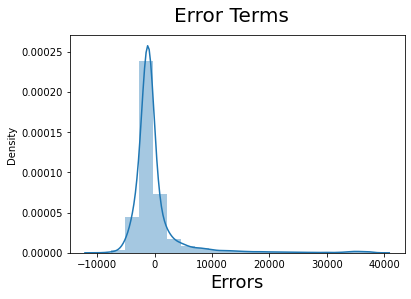

In [106]:
# Plot the histogram of the error terms
residuals_train=y_train.values.reshape(1,-1)-y_train_pred.values
fig = plt.figure()
sns.distplot(residuals_train, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0, 0.5, 'Residuals')

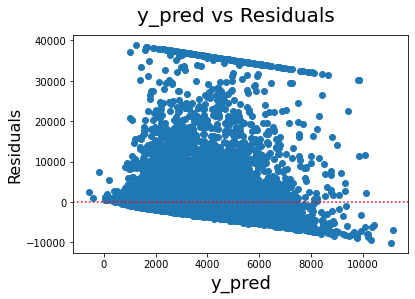

In [107]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_train_pred.values, residuals_train)
plt.axhline(y=0, color='r', linestyle=':')
fig.suptitle('y_pred vs Residuals', fontsize = 20)              # Plot heading 
plt.xlabel('y_pred', fontsize = 18)                          # X-label
plt.ylabel('Residuals', fontsize = 16)   

In [108]:
# Calculating metrics such as R2 score, RSS, MSE and RMSE

# Calculating R2 Score for Train predictions
r2_train=r2_score(y_train, y_train_pred)
print('R2_Score',r2_train)

# Calculating RSS for Train predictions
rss_train = np.sum(np.square(residuals_train))
print('RSS:',rss_train)

# Calculating MSE Score for Train predictions
mse_train = mean_squared_error(y_train, y_train_pred)
print('Mean Squared Error:',mse_train)

# Calculating RMSE Score for Train predictions
rmse_train = mse_train**0.5
print('RMSE:',rmse_train)

R2_Score 0.07046387667397791
RSS: 517840119377.07715
Mean Squared Error: 24880609.204683475
RMSE: 4988.046632168095


In [109]:
# Predicting y-values using the Test dataset
X_test_lm=sm.add_constant(X_test_rfecv[cols2])
y_test_pred = lm_4.predict(X_test_lm)

In [110]:
residuals_test=y_test.values.reshape(1,-1)-y_test_pred.values

# Calculating metrics such as R2 score, RSS, MSE and RMSE

# Calculating R2 Score for test predictions
r2_test=r2_score(y_test, y_test_pred)
print('R2_Score',r2_test)

# Calculating RSS for test predictions
rss_test = np.sum(np.square(residuals_test))
print('RSS:',rss_test)

# Calculating MSE for test predictions
mse_test = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error:',mse_test)

# Calculating RMSE for test predictions
rmse_test = mse_test**0.5
print('RMSE:',rmse_test)

R2_Score 0.05401564348932664
RSS: 211241440756.3979
Mean Squared Error: 23681775.869551335
RMSE: 4866.3924902900435


In [111]:
# Creating a list with all the metrics of the linear model
lm_metrics=[r2_train,r2_test,rss_train,rss_test,mse_train,mse_test,rmse_train,rmse_test]
lm_metrics

[0.07046387667397791,
 0.05401564348932664,
 517840119377.07715,
 211241440756.3979,
 24880609.204683475,
 23681775.869551335,
 4988.046632168095,
 4866.3924902900435]

### 7.3: Applying Ridge Regression on RFECV dataset

In [112]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation for Ridge Regression
folds = 5
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train_rfecv, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [113]:
# Printing the best hyperparameter alpha
print(ridge_cv.best_params_['alpha'])

500


In [114]:
#Fitting Ridge model for alpha and printing coefficients which have been penalised
alpha = ridge_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_rfecv, y_train)
print(ridge.coef_)

[[ 101.71057179   55.38681087  147.92790939  -10.19254924 -100.54525821
   301.07266655 -153.68240807   95.16915992   -8.8729626  -208.28314307
    47.47058628 -142.87534676 -297.08159959 -283.59252254  -32.68355606
   -22.68701478 -161.29455936   90.9675817   -72.99778257  -99.87111594
   -48.61900635  -93.00816653 -144.11858644  936.51764806  207.74745136
    -9.60846594  319.42020031  137.10032545   49.20571441   24.29346547
    59.98653142   47.21202743  -15.94350369  159.63345026  103.48150143
   -27.70264872 -170.60113605  -59.48720065  204.61208972  -62.92148705
   -62.78565722   11.11601871  -36.51848186  -27.4025834   -64.8391118
   -17.98037097 -152.64981801   67.65183684    8.40147139   75.97526916
    90.28476904   65.28551606   40.70079691]]


In [115]:
# Predicting y-values using the Train and test dataset
y_pred_train = ridge.predict(X_train_rfecv)
y_pred_test = ridge.predict(X_test_rfecv)

In [116]:
# Calculating metrics such as R2 score, RSS, MSE and RMSE
ridge_metrics = []

# Calculating R2 Score for train and test predictions
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score (Train):',r2_train_lr)
r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Score (Test):',r2_test_lr)

# Calculating RSS for train and test predictions
rss1_lr = np.sum(np.square(y_train.values - y_pred_train))
print('RSS (Train):',rss1_lr)
rss2_lr = np.sum(np.square(y_test.values - y_pred_test))
print('RSS (Test):',rss2_lr)

# Calculating MSE for train and test predictions
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE (Train):',mse_train_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE (Test):',mse_test_lr)

# Calculating RMSE for train and test predictions
rmse_train_lr = mse_train_lr**0.5
print('RMSE (Train):',rmse_train_lr)
rmse_test_lr =mse_test_lr**0.5
print('RMSE (Test):',rmse_test_lr)

# Assigning all the metrics to a list
ridge_metrics=[r2_train_lr,r2_test_lr,rss1_lr,rss2_lr,mse_train_lr,mse_test_lr,rmse_train_lr,rmse_test_lr]

R2 Score (Train): 0.0717727505454403
R2 Score (Test): 0.05475902707877023
RSS (Train): 517110952016.2409
RSS (Test): 211075440738.1228
MSE (Train): 24845574.97795805
MSE (Test): 23663166.002031703
RMSE (Train): 4984.533576771055
RMSE (Test): 4864.480034087066


### 7.4: Applying Lasso Regression on RFECV dataset

In [117]:
# Creating a lasso Object
lasso = Lasso()

# cross validation for Lasso Regression
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train_rfecv, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [118]:
# Printing the best hyperparameter alpha
print(lasso_cv.best_params_)

{'alpha': 8.0}


In [119]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha =9
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_rfecv, y_train) 

Lasso(alpha=9)

In [120]:
# Printing coefficients of Lasso regression
lasso.coef_

array([  90.96092427,    0.        ,   16.39367646,    0.        ,
         -0.        ,  308.46254993, -146.06714849,   98.90821651,
         -0.        , -211.80757249,   41.37687585, -124.33691994,
       -271.32040157, -230.7812603 ,   -1.63113663,    0.        ,
       -118.73785171,   88.77296986,  -72.49582357, -110.60174149,
        -39.68011525, -112.2688091 , -170.92918164, 1007.91223028,
        205.29999042,   -0.        ,  307.91509076,  113.58024877,
         22.81387493,    0.        ,   36.30729003,   49.66657128,
         -0.        ,  126.09438611,   73.95189908,   -9.16287939,
       -162.6420614 ,  -45.83181493,  188.55983575,  -55.75126935,
        -50.56643359,   -0.        ,  -14.27293796,   -0.        ,
        -51.8330432 ,  -11.9013042 , -109.90645805,   19.77124608,
         -0.        ,   70.08046384,   80.12560759,   48.64829875,
         35.74719815])

In [121]:
# Predicting y-values using the Train and test dataset
y_pred_train = lasso.predict(X_train_rfecv)
y_pred_test = lasso.predict(X_test_rfecv)

In [122]:
# Calculating metrics such as R2 score, RSS, MSE and RMSE
lasso_metrics = []

# Calculating R2 Score for train and test predictions
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score (Train):',r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Score (Test):',r2_test_lr)


# Calculating RSS for train and test predictions
rss1_lr = np.sum(np.square(y_train.values - y_pred_train))
print('RSS (Train):',rss1_lr)

rss2_lr = np.sum(np.square(y_test.values - y_pred_test))
print('RSS (Test):',rss2_lr)


# Calculating MSE for train and test predictions
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE (Train):',mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE (Test):',mse_test_lr)


# Calculating RMSE for train and test predictions
rmse_train_lr = mse_train_lr**0.5
print('RMSE (Train):',rmse_train_lr)

rmse_test_lr =mse_test_lr**0.5
print('RMSE (Test):',rmse_test_lr)

# Assigning all the metrics to a list
lasso_metrics=[r2_train_lr,r2_test_lr,rss1_lr,rss2_lr,mse_train_lr,mse_test_lr,rmse_train_lr,rmse_test_lr]

R2 Score (Train): 0.07150576368704409
R2 Score (Test): 0.05505141202655983
RSS (Train): 1.2383755202510792e+16
RSS (Test): 2135658956503040.8
MSE (Train): 24852721.33356473
MSE (Test): 23655846.436170463
RMSE (Train): 4985.250378222214
RMSE (Test): 4863.72762767103


In [123]:
# Creating a table which contain all the metrics for RFECV dataset predictions
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)','RMSE  (Train)','RMSE (Test)'], 
        'Linear Regression': lm_metrics
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
rg_metric = pd.Series(ridge_metrics, name = 'Ridge Regression')
ls_metric = pd.Series(lasso_metrics, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.07046,0.07177,0.07151
1,R2 Score (Test),0.05402,0.05476,0.05505
2,RSS (Train),517840119377.07715,517110952016.24091,12383755202510792.00000
3,RSS (Test),211241440756.39789,211075440738.12280,2135658956503040.75000
4,MSE (Train),24880609.20468,24845574.97796,24852721.33356
5,MSE (Test),23681775.86955,23663166.00203,23655846.43617
6,RMSE (Train),4988.04663,4984.53358,4985.25038
7,RMSE (Test),4866.39249,4864.48003,4863.72763


### 7.5: Using Random forest on RFECV Dataset

From the above residual analysis we could observe that the data is not linearly related to target variable. We will try creating a random forest ensemble to see if this model helps in predicting shares in a better way.

**Note:**
- Below hyperparameters used are selected after performing Hyperparameter tuning over GridsearchCV. We have not included it due to the time constraints. You can refer to the commented code present in Appendix Section in the bottom of the notebook.

In [124]:
# Creating a Random forest object with parameters obtained after hyperparameter tuning
classifier_rf = RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=200,
                      n_jobs=-1, random_state=42)

In [125]:
# Fitting the classifier object on train dataset
classifier_rf.fit(X_train_rfecv,y_train)

RandomForestRegressor(max_depth=25, min_samples_leaf=50, n_estimators=200,
                      n_jobs=-1, random_state=42)

In [126]:
# Predicting the y-values using the train and test dataset
y_train_pred_rf = classifier_rf.predict(X_train_rfecv)
y_test_pred_rf = classifier_rf.predict(X_test_rfecv)

In [127]:
# Metrics to give an overall sense of error in the model
residuals_train=y_train.values.reshape(1,-1)-y_train_pred_rf

r2_train=r2_score(y_train, y_train_pred_rf)
print('R2_Score',r2_train)

rss_train = np.sum(np.square(residuals_train))
print('RSS:',rss_train)

mse_train = mean_squared_error(y_train, y_train_pred_rf)
print('Mean Squared Error:',mse_train)

rmse_train = mse_train**0.5
print('RMSE:',rmse_train)

R2_Score 0.16839822576058783
RSS: 463281362864.5677
Mean Squared Error: 22259230.426395413
RMSE: 4717.968887815541


In [128]:
# Metrics to give an overall sense of error in the model
residuals_test=y_test.values.reshape(1,-1)-y_test_pred_rf

r2_test=r2_score(y_test, y_test_pred_rf)
print('R2_Score',r2_test)

rss_test = np.sum(np.square(residuals_test))
print('RSS:',rss_test)

mse_test = mean_squared_error(y_test, y_test_pred_rf)
print('Mean Squared Error:',mse_test)

rmse_test = mse_test**0.5
print('RMSE:',rmse_test)

R2_Score 0.060865026600930405
RSS: 209711950816.2845
Mean Squared Error: 23510308.38747584
RMSE: 4848.742969829999


In [129]:
# Adding the metrics to the final metrics dataframe
rf_metrics=[r2_train,r2_test,rss_train,rss_test,mse_train,mse_test,rmse_train,rmse_test]
final_metric['Random Forest']=pd.Series(rf_metrics)

In [130]:
# Printing the metrics dataframe by PCA
pca_metrics

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.06661,0.06763,0.06765
1,R2 Score (Test),0.05034,0.05097,0.05074
2,RSS (Train),519985967671.46722,519417914606.90613,12370558459080726.00000
3,RSS (Test),212061477402.93536,211921553372.83905,2133623161098112.00000
4,MSE (Train),24983710.54973,24956417.36448,24956016.10134
5,MSE (Test),23773708.22903,23758021.67857,23763674.15723
6,RMSE (Train),4998.37079,4995.63984,4995.59967
7,RMSE (Test),4875.82898,4874.22011,4874.79991


In [131]:
# Printing the final metrics dataframe by RFECV
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression,Random Forest
0,R2 Score (Train),0.07046,0.07177,0.07151,0.16840
1,R2 Score (Test),0.05402,0.05476,0.05505,0.06087
2,RSS (Train),517840119377.07715,517110952016.24091,12383755202510792.00000,463281362864.56769
3,RSS (Test),211241440756.39789,211075440738.12280,2135658956503040.75000,209711950816.28448
4,MSE (Train),24880609.20468,24845574.97796,24852721.33356,22259230.42640
5,MSE (Test),23681775.86955,23663166.00203,23655846.43617,23510308.38748
6,RMSE (Train),4988.04663,4984.53358,4985.25038,4717.96889
7,RMSE (Test),4866.39249,4864.48003,4863.72763,4848.74297


**Observations:**
- As we can observe the difference in RMSE between these models is extremely low, but we can observe that the best RMSE was given by the Random forest model. Hence we will be using this model for predictions on unseen dataset.
- We can also observe that the prediction by RFECV dataset are better than PCA Dataset Hence we will be using RFECV dataset to make predictions oon onseen dataset.

### 7.6: Determining Feature Importance

We will be using Lasso model to determine the feature importances as it is easy to interpret than random forest

In [132]:
# creating a dataframe with the important features
imp_df = pd.DataFrame({
    "Varname": X_train_rfecv.columns,
    "Imp": ridge.coef_[0]})
imp_df=imp_df.sort_values(by='Imp', ascending=False,key=lambda x:abs(x))
imp_df.head(10)

,Varname,Imp
23,kw_avg_avg,936.51765
26,self_reference_avg_sharess,319.42020
5,num_hrefs,301.07267
12,data_channel_is_entertainment,-297.08160
13,data_channel_is_bus,-283.59252
9,average_token_length,-208.28314
24,self_reference_min_shares,207.74745
38,global_subjectivity,204.61209
36,LDA_02,-170.60114
16,data_channel_is_world,-161.29456


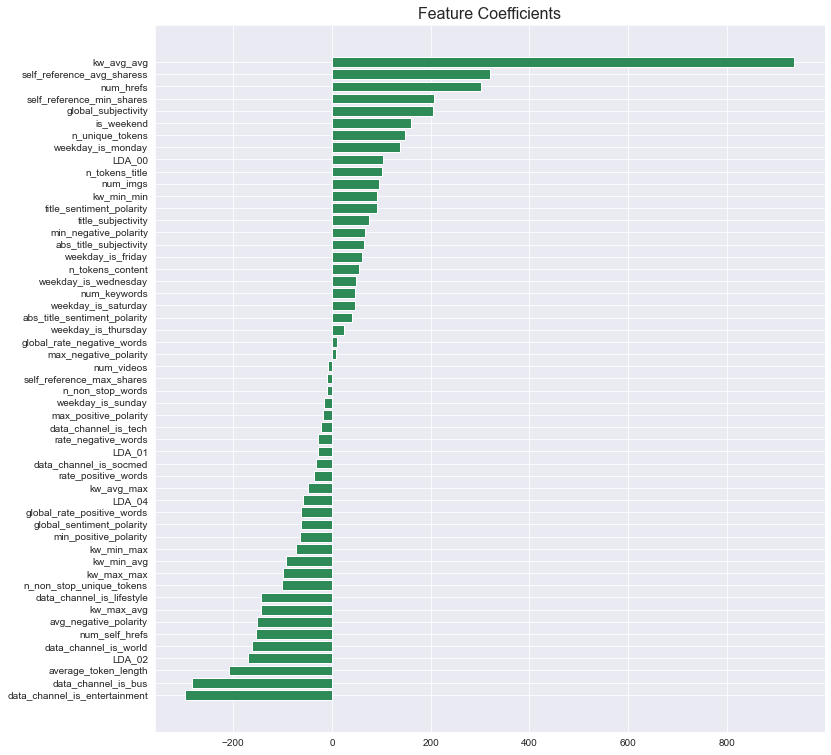

In [133]:
# Plotting a bargraph for the coefficients of the final model
fig1 = plt.figure(figsize = (12,13))
sns.set_style("darkgrid")
df=imp_df.sort_values(by='Imp')
ax = fig1.add_subplot(1, 1, 1)
ax.barh(df.Varname,df.Imp,color='seagreen')
plt.title('Feature Coefficients',fontdict = {'fontsize':16})
plt.show()

## Step 8: Creating a submission file for unseen dataset using best model built.

In [134]:
# Transforming the dataframe using RFECV Object
unseen_rfecv=pd.DataFrame(rfecv.transform(unseen))
unseen_rfecv.columns=unseen.columns[rfecv.support_]

In [135]:
# Making predictions on the unseen set
unseen_pred = classifier_rf.predict(unseen_rfecv)

# Converting unseen_pred to a dataframe 
unseen_pred_df = pd.DataFrame(unseen_pred)

# Adding id column to the dataframe for submission
unseen_pred_df['id']=unseen_df.id

# Renaming the columns
unseen_pred_df= unseen_pred_df.rename(columns={ 0 : 'shares'})

# Exporting the dataframe to csv
unseen_pred_df[['id','shares']].to_csv(r'Submission.csv',index=False,header=True)

## Step 9: Conclusion

- We have built Linear, Ridge and Lasso models on both PCA, RFECV Dataset. We could find that the models built with RFECV transformed dataset had higher RMSE values. 
- After building these models and performing the residual analysis we could observe that the data is not linear. Hence, we built a model using random forest and we could see that the RMSE is very close to what we have got for RFECV Lasso model. 
- Hence we will be using this model for final submission on the unseen data.
- This model predicts the shares of an online news article based on parameters like
- This Random Forest model performs well on both train and test sets. Although the R2 Score is low even 5-7% variance explained by model is also important for business. Hence, we will be using RMSE as appropriate metric for this problem statement.


**Following are the metrics:**<br><br>

In [136]:
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression,Random Forest
0,R2 Score (Train),0.07046,0.07177,0.07151,0.16840
1,R2 Score (Test),0.05402,0.05476,0.05505,0.06087
2,RSS (Train),517840119377.07715,517110952016.24091,12383755202510792.00000,463281362864.56769
3,RSS (Test),211241440756.39789,211075440738.12280,2135658956503040.75000,209711950816.28448
4,MSE (Train),24880609.20468,24845574.97796,24852721.33356,22259230.42640
5,MSE (Test),23681775.86955,23663166.00203,23655846.43617,23510308.38748
6,RMSE (Train),4988.04663,4984.53358,4985.25038,4717.96889
7,RMSE (Test),4866.39249,4864.48003,4863.72763,4848.74297


**The Top most important features that indicate if a news article will have high shares or not are:**
1. `kw_avg_avg` - Positive coefficient of 936.51765. This means that if the avg keyword average shares is high then the shares for that news article is also high.
2. `self_reference_avg_sharess` - Positive coefficient of 319.42020. This means that if the Avg. shares of referenced articles in Mashable increases then the shares for that news article also increases. This means that the article is relatable and interesting to the internet users.
3. `num_hrefs` - Positive coefficient of 301.07267. This indicates that as the number of links in the article increases then there is a good chance that the shares of the news article will also increase.
4. `data_channel_is_entertainment` - Negative coeffiecient of -297.08160. This implies that if the data channel is entertainment then it is more likely that the news article will have less shares i.e., this topic for a news article might not be relatable to the readers.
5. `data_channel_is_bus` - Negative coefficient of -283.59252. This implies that if the data channel is business then it is more likely that the news article will have less shares i.e., this topic for a news article might not be relatable to the readers.
6. `average_token_length` - Positive coefficient of -208.28314. This means that if the average token length is high then then the article might have less shares i.e., as the length of words increase the readability decreases and hence will affect the share of the article.

## Step 10: Next steps for News article publishing industry

- In order to produce articles with high popularity, News article publishers should focus on these following points- 
  - If the Average shares of self referenced articles produced by mashable is increasing it means that it is gaining popularity and shares increase. Provide good number of references which are relatable and in tread to the news article to increase the shares of the article.
  - Increase the number of links provided in the news articles so that the readers will have a wide range of stories and will read these links, further increasing in share
  - Keep in mind that the average token length is not high as it increases the difficulty in reading the article. Add words which are simple and easy to understand which reaches a broader audience and helps in increasing the shares.
  - Reduce the articles with Data channel as Entertainment or Business. As these topics seem like they are not relatable to the online news readers which are giving lesser shares. To increase the shares for these article we can provide multiple links and write the articles in sucha way that the user is able to understand which help in increasing the shares.

## Appendix

In [137]:
# # Create the parameter grid based on the results of random search 
# params = {
#     'max_depth': [ 8, 15, 20, 25, 30],
#     'min_samples_leaf': [10, 20, 50, 100],
#     'n_estimators': [50, 100, 150, 200]
# }

In [138]:
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
#                           cv=4, n_jobs=-1, verbose=1, scoring = "neg_mean_absolute_error")

In [139]:
# %%time
# grid_search.fit(X_train,y_train)